<a href="https://colab.research.google.com/github/thuc-github/MIS710-T12023/blob/main/A1/MIS710%20A1%20Template%20T1%202023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIS710 Machine Learning in Business - Assignment 1



The victorian government's department of transport has tasked VicCrashAnalytics to build a classification model to classify if a road segment is a blackspot or not.

The Client has provided us with this dataset renamed as blackspots. the dataset contains various characteristics that could affect a road segment being a blackspot.

Therefore, the aim is to build a classification model using a logistic regression algorythem.

the logistic algorythem uses 8 variables.

Based on the findings it is clear that areas with high volumes of pedestrians and vehicles have a higher risk of being a blackspot.

Therefore, the department should allocate more resources to such areas.

# 1 Loading required libraries and the dataset

Loading the required libraries for data manipulation, analysis and visualisation.

In [ ]:
#load libraries
import pandas as pd #for data manipulation and analysis
import numpy as np #for working with arrays

#import data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


#Loading the dataset

In [ ]:
# loading dataset
blackspots = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment 1/Blackspot.csv')
#exploring the dataset
print(blackspots)

        ID               EZI_ROAD_NAME              ROAD_NAME ROAD_TYPE  \
0     3699                  GROVE ROAD                  GROVE      ROAD   
1      576          BACCHUS MARSH ROAD          BACCHUS MARSH      ROAD   
2      758                GRUBBED ROAD                GRUBBED      ROAD   
3       89                VIGOR STREET                  VIGOR    STREET   
4     8773                FAIRMAN ROAD                FAIRMAN      ROAD   
...    ...                         ...                    ...       ...   
5321   256  WARBURTON-WOODS POINT ROAD  WARBURTON-WOODS POINT      ROAD   
5322  5182             GLENELG HIGHWAY                GLENELG   HIGHWAY   
5323  4196          CAPE PATERSON ROAD          CAPE PATERSON      ROAD   
5324  4352                MCPHANS ROAD                MCPHANS      ROAD   
5325   223                 ROGERS ROAD                 ROGERS      ROAD   

      AGE_LESS_THAN_15YRS_PCNT  AGE_15_24YRS_PCNT  AGE_25_44YRS_PCNT  \
0                     0.121

In [ ]:
#getting sample size and number of columns
print('Sample size:', blackspots.shape[0])
print('Number of columns:', blackspots.shape[1])

Sample size: 5326
Number of columns: 36


In [ ]:
#Getting information on the data types, number missing values and shape of dataframe
print(blackspots.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5326 entries, 0 to 5325
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               5326 non-null   int64  
 1   EZI_ROAD_NAME                    5326 non-null   object 
 2   ROAD_NAME                        5326 non-null   object 
 3   ROAD_TYPE                        5326 non-null   object 
 4   AGE_LESS_THAN_15YRS_PCNT         5326 non-null   float64
 5   AGE_15_24YRS_PCNT                5326 non-null   float64
 6   AGE_25_44YRS_PCNT                5326 non-null   float64
 7   AGE_45_64YRS_PCNT                5326 non-null   float64
 8   AGE_18YRS_OVER_PCNT              5326 non-null   float64
 9   AGE_65YRS_OVER_PCNT              5317 non-null   float64
 10  SEO_PERSONS_PCNT                 5326 non-null   float64
 11  FC_COUPLE_NO_CHILDREN_PCNT       5326 non-null   float64
 12  FC_COUPLE_WITH_CHILD

Number of liquor license venues have been typed as float whereas it should be integer

In [ ]:
#Exploring top 10 values of the dataset
#setting option to show all columns
pd.set_option('display.max_columns', None)
blackspots.head(10)

ID       EZI_ROAD_NAME      ROAD_NAME ROAD_TYPE  \
0  3699          GROVE ROAD          GROVE      ROAD   
1   576  BACCHUS MARSH ROAD  BACCHUS MARSH      ROAD   
2   758        GRUBBED ROAD        GRUBBED      ROAD   
3    89        VIGOR STREET          VIGOR    STREET   
4  8773        FAIRMAN ROAD        FAIRMAN      ROAD   
5  5731     MOE-RAWSON ROAD     MOE-RAWSON      ROAD   
6  4928     ANDERSON STREET       ANDERSON    STREET   
7  6127      BENNETT STREET        BENNETT    STREET   
8  4140           PIER ROAD           PIER      ROAD   
9  3864       GORDON STREET         GORDON    STREET   

   AGE_LESS_THAN_15YRS_PCNT  AGE_15_24YRS_PCNT  AGE_25_44YRS_PCNT  \
0                  0.121988           0.058735           0.228916   
1                  0.215894           0.141722           0.312583   
2                  0.185304           0.102236           0.194888   
3                  0.167763           0.062500           0.286184   
4                  0.201238           0.108359           0.204334   
5                  0.144578           0.072289           0.162651   
6                  0.210619           0.093805           0.277876   
7                  0.143345           0.095563           0.208191   
8                  0.150000           0.057143           0.200000   
9                  0.219336           0.096681           0.222222   

   AGE_45_64YRS_PCNT  AGE_18YRS_OVER_PCNT  AGE_65YRS_OVER_PCNT  \
0           0.269578             0.853916             0.320783   
1           0.201325             0.741722             0.128477   
2           0.348243             0.757188             0.169329   
3           0.322368             0.815789             0.161184   
4           0.340557             0.761610             0.145511   
5           0.403614             0.828313             0.216867   
6           0.276106             0.755752             0.141593   
7           0.303754             0.829352             0.249147   
8           0.297619             0.823810             0.295238   
9           0.259740             0.735931             0.202020   

   SEO_PERSONS_PCNT  FC_COUPLE_NO_CHILDREN_PCNT  FC_COUPLE_WITH_CHILDREN_PCNT  \
0          0.769466                    0.575758                      0.303030   
1          0.797941                    0.401869                      0.518692   
2          0.950311                    0.505155                      0.360825   
3          0.818792                    0.454545                      0.363636   
4          0.852201                    0.431579                      0.484211   
5          0.855385                    0.500000                      0.371795   
6          0.953571                    0.418301                      0.464052   
7          0.863014                    0.400000                      0.384615   
8          0.898104                    0.584071                      0.238938   
9          0.891176                    0.350282                      0.384181   

   FC_SINGLE_PARENT  CARS_ZERO_HH_PCNT  CARS_ONE_HH_PCNT  \
0          0.075758           0.068493          0.429224   
1          0.126168           0.011450          0.225191   
2          0.103093           0.000000          0.177570   
3          0.227273           0.054545          0.372727   
4          0.052632           0.000000          0.115385   
5          0.076923           0.066667          0.214815   
6          0.137255           0.000000          0.237864   
7          0.230769           0.075000          0.491667   
8          0.159292           0.064516          0.424731   
9          0.231638           0.058366          0.377432   

   CARS_TWO_OR_MORE_HH_PCNT  DWELLING_SEP_HOUSE_PCNT  \
0                  0.461187                 0.745455   
1                  0.721374                 1.000000   
2                  0.785047                 1.000000   
3                  0.545455                 1.000000   
4                  0.884615                 1.000000   
5           

In [ ]:
#Exploring data, last 10 values of the blackspots data
blackspots.tail(10)

ID               EZI_ROAD_NAME              ROAD_NAME ROAD_TYPE  \
5316  3819              TULLOCH STREET                TULLOCH    STREET   
5317  5020               ATTWOODS ROAD               ATTWOODS      ROAD   
5318  2878              MCHAFFIE DRIVE               MCHAFFIE     DRIVE   
5319  1428                 TOLSON ROAD                 TOLSON      ROAD   
5320  3404         SUNDERLAND BAY ROAD         SUNDERLAND BAY      ROAD   
5321   256  WARBURTON-WOODS POINT ROAD  WARBURTON-WOODS POINT      ROAD   
5322  5182             GLENELG HIGHWAY                GLENELG   HIGHWAY   
5323  4196          CAPE PATERSON ROAD          CAPE PATERSON      ROAD   
5324  4352                MCPHANS ROAD                MCPHANS      ROAD   
5325   223                 ROGERS ROAD                 ROGERS      ROAD   

      AGE_LESS_THAN_15YRS_PCNT  AGE_15_24YRS_PCNT  AGE_25_44YRS_PCNT  \
5316                  0.228632           0.123932           0.294872   
5317                  0.221453           0.114187           0.224913   
5318                  0.125843           0.080899           0.193258   
5319                  0.191011           0.094382           0.249438   
5320                  0.216535           0.069554           0.250656   
5321                  0.152047           0.087719           0.198830   
5322                  0.142119           0.090439           0.209302   
5323                  0.163701           0.106762           0.170819   
5324                  0.155039           0.173127           0.129199   
5325                  0.197647           0.129412           0.200000   

      AGE_45_64YRS_PCNT  AGE_18YRS_OVER_PCNT  AGE_65YRS_OVER_PCNT  \
5316           0.247863             0.728632             0.104701   
5317           0.332180             0.733564             0.107266   
5318           0.269663             0.842697             0.330337   
5319           0.334831             0.768539             0.130337   
5320           0.282152             0.761155             0.181102   
5321           0.385965             0.812865             0.175439   
5322           0.328165             0.816537             0.229974   
5323           0.352313             0.779359             0.206406   
5324           0.310078             0.806202             0.232558   
5325           0.301176             0.764706             0.171765   

      SEO_PERSONS_PCNT  FC_COUPLE_NO_CHILDREN_PCNT  \
5316          0.916844                    0.349206   
5317          0.845161                    0.358025   
5318          0.866359                    0.576923   
5319          0.931663                    0.431818   
5320          0.877632                    0.364583   
5321          0.850829                    0.413043   
5322          0.896465                    0.482456   
5323          0.927536                    0.443038   
5324          0.860825                    0.468750   
5325          0.873171                    0.419048   

      FC_COUPLE_WITH_CHILDREN_PCNT  FC_SINGLE_PARENT  CARS_ZERO_HH_PCNT  \
5316                      0.388889          0.238095           0.015306   
5317                      0.493827          0.172840           0.000000   
5318                      0.269231          0.125000           0.053571   
5319                      0.439394          0.159091           0.000000   
5320                      0.427083          0.182292           0.030405   
5321                      0.304348          0.173913           0.052632   
5322                      0.254386          0.149123           0.035503   
5323                      0.405063          0.101266           0.000000   
5324                      0.354167          0.125000           0.000000   
5325                      0.542857          0.047619           0.000000   

      CARS_ONE_HH_PCNT  CARS_TWO_OR_MORE_HH_PCNT  DWELLING_SEP_HOUSE_PCNT  \
5316          0.392857                  0.525510                 0.970443   
5317          0.221053                  0.747368      

In [ ]:
#Exploring data, random 10 values of the blackspots data
blackspots.sample(10)

ID      EZI_ROAD_NAME    ROAD_NAME ROAD_TYPE  \
5016  4056       BASS HIGHWAY         BASS   HIGHWAY   
4995  3240      HALLWAY DRIVE      HALLWAY     DRIVE   
1100  1306       OCONNOR ROAD      OCONNOR      ROAD   
1680  8409         RYANS ROAD        RYANS      ROAD   
2579  3817       BASS HIGHWAY         BASS   HIGHWAY   
1908  2414   GREAT OCEAN ROAD  GREAT OCEAN      ROAD   
3034  2747  LORNA DOONE DRIVE  LORNA DOONE     DRIVE   
1689  5531   NEERIM EAST ROAD  NEERIM EAST      ROAD   
4387  2070         BEACH ROAD        BEACH      ROAD   
924   6239    SETTLEMENT ROAD   SETTLEMENT      ROAD   

      AGE_LESS_THAN_15YRS_PCNT  AGE_15_24YRS_PCNT  AGE_25_44YRS_PCNT  \
5016                  0.250000           0.097087           0.235437   
4995                  0.192612           0.092348           0.203166   
1100                  0.233276           0.106346           0.267581   
1680                  0.221453           0.114187           0.224913   
2579                  0.228632           0.123932           0.294872   
1908                  0.198895           0.091160           0.182320   
3034                  0.140312           0.060134           0.182628   
1689                  0.137931           0.105911           0.130542   
4387                  0.107239           0.109920           0.252011   
924                   0.192771           0.090361           0.219880   

      AGE_45_64YRS_PCNT  AGE_18YRS_OVER_PCNT  AGE_65YRS_OVER_PCNT  \
5016           0.266990             0.699029             0.150485   
4995           0.369393             0.765172             0.142480   
1100           0.274443             0.730703             0.118353   
1680           0.332180             0.733564             0.107266   
2579           0.247863             0.728632             0.104701   
1908           0.353591             0.751381             0.174033   
3034           0.258352             0.846325             0.358575   
1689           0.374384             0.802956             0.251232   
4387           0.270777             0.855228             0.260054   
924            0.307229             0.765060             0.189759   

      SEO_PERSONS_PCNT  FC_COUPLE_NO_CHILDREN_PCNT  \
5016          0.878049                    0.349057   
4995          0.862534                    0.386139   
1100          0.904274                    0.339623   
1680          0.845161                    0.358025   
2579          0.916844                    0.349206   
1908          0.820937                    0.481481   
3034          0.871264                    0.548673   
1689          0.870324                    0.490196   
4387          0.892105                    0.494624   
924           0.888218                    0.436782   

      FC_COUPLE_WITH_CHILDREN_PCNT  FC_SINGLE_PARENT  CARS_ZERO_HH_PCNT  \
5016                      0.481132          0.160377           0.000000   
4995                      0.415842          0.217822           0.000000   
1100                      0.547170          0.113208           0.000000   
1680                      0.493827          0.172840           0.000000   
2579                      0.388889          0.238095           0.015306   
1908                      0.419753          0.111111           0.000000   
3034                      0.203540          0.203540           0.066667   
1689                      0.352941          0.186275           0.000000   
4387                      0.387097          0.118280           0.088235   
924                       0.528736          0.034483           0.000000   

      CARS_ONE_HH_PCNT  CARS_TWO_OR_MORE_HH_PCNT  DWELLING_SEP_HOUSE_PCNT  \
5016          0.130081                  0.869919                 1.000000   
4995          0.372263                  0.627737                 1.000000   
1100          0.170213                  0.787234                 0.984375   
1680          0.221053                  0.747368                 1.000000   
2579          0.392857          

In [ ]:
#checking EZI road name for unique values.
print(blackspots['EZI_ROAD_NAME'].value_counts())

BASS HIGHWAY           52
GREAT OCEAN ROAD       51
COLAC-BALLARAT ROAD    33
GLENELG HIGHWAY        32
PRINCES WAY            30
                       ..
CORDUROY ROAD           1
ABELS ROAD              1
ST KILDA STREET         1
WALSHES ROAD            1
ROGERS ROAD             1
Name: EZI_ROAD_NAME, Length: 2185, dtype: int64


In [ ]:
#checking EZI Road name for unique values.
print(blackspots['ROAD_NAME'].value_counts())

PRINCES           75
BASS              57
GREAT OCEAN       51
COLAC-BALLARAT    33
GLENELG           32
                  ..
HILLS              1
MORGANS            1
VALLEY VIEW        1
FRAWLEYS           1
ROGERS             1
Name: ROAD_NAME, Length: 2020, dtype: int64


In [ ]:
#checking Road type for unique values.
print(blackspots['ROAD_TYPE'].value_counts())

ROAD       3400
STREET     1324
DRIVE       295
HIGHWAY     180
WAY          77
FREEWAY      50
Name: ROAD_TYPE, dtype: int64


<Axes: xlabel='ROAD_TYPE', ylabel='count'>

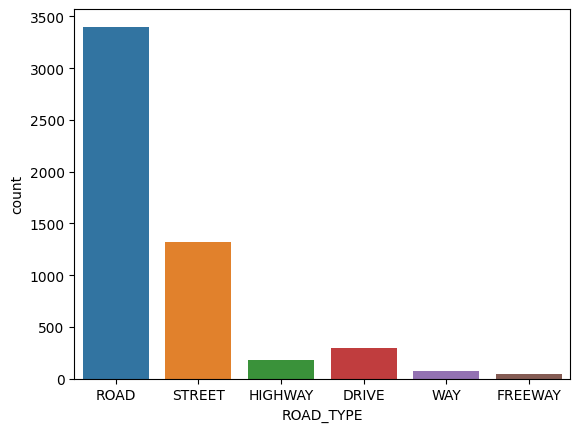

In [ ]:
#Using seaborn to visualise road types
sns.countplot(x=blackspots['ROAD_TYPE'])

In [ ]:
blackspots['Lq_Licenses'].dtypes


dtype('float64')

In [ ]:
blackspots['Lq_Licenses']

0       14.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
5321     0.0
5322     0.0
5323     0.0
5324     0.0
5325     0.0
Name: Lq_Licenses, Length: 5326, dtype: float64

Number of liquor license venues have been identified as float whereas it should be integer

EZI Road name and Road name seems to have duplicating data. Therefore, It can be removed as road type will indicate what type of roads.

**Exploring Missing Values**


In [ ]:
print(blackspots.isnull().sum().sort_values(ascending=0))

AGE_65YRS_OVER_PCNT                9
Lq_Licenses                        6
Primary_Production%                0
OCCUPATION_BLUE_COLLAR_PCNT        0
SEIFA                              0
Commercial%                        0
Industrial%                        0
Residential%                       0
Parkland%                          0
ID                                 0
DWELLING_FLAT_UNIT_APART_PCNT      0
Intersection                       0
Supermarket                        0
primary_school                     0
secondary_school                   0
km_post                            0
traffic_signal                     0
OCCUPATION_WHITE_COLLAR_PCNT       0
DWELLING_SEMID_RO_OR_TCE_H_TH_P    0
EZI_ROAD_NAME                      0
AGE_18YRS_OVER_PCNT                0
ROAD_NAME                          0
ROAD_TYPE                          0
AGE_LESS_THAN_15YRS_PCNT           0
AGE_15_24YRS_PCNT                  0
AGE_25_44YRS_PCNT                  0
AGE_45_64YRS_PCNT                  0
S

Univariate analysis

**Handling Missing Data (Age 65 over percentage, Number of Liquour Venues) **

In [ ]:
#Age 65 and over percentage
blackspots['AGE_65YRS_OVER_PCNT'].describe()

count    5317.000000
mean        0.202530
std         0.105217
min         0.000000
25%         0.149367
50%         0.181102
75%         0.237288
max         1.000000
Name: AGE_65YRS_OVER_PCNT, dtype: float64

<Axes: xlabel='AGE_65YRS_OVER_PCNT', ylabel='Count'>

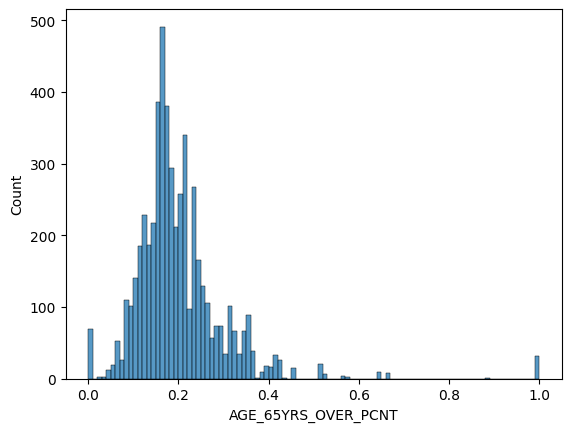

In [ ]:
#Histogram for 65 and above
sns.histplot(data=blackspots, x='AGE_65YRS_OVER_PCNT')

<Axes: xlabel='AGE_65YRS_OVER_PCNT'>

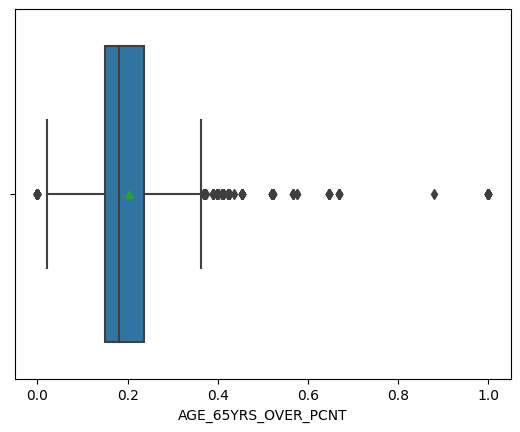

In [ ]:
#Boxplot for 65 and above percentage
sns.boxplot(data=blackspots, x='AGE_65YRS_OVER_PCNT', showmeans=True)

As the Age 65 and over is skewed the missing 09 values will be replaced by the median later

In [ ]:
#Mode for 65 and over
blackspots['AGE_65YRS_OVER_PCNT'].median()

0.181102362

In [ ]:
#Number of Liquour Venues
blackspots['Lq_Licenses'].describe()


count    5320.000000
mean        0.378008
std         1.550966
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        26.000000
Name: Lq_Licenses, dtype: float64

<Axes: xlabel='Lq_Licenses', ylabel='Count'>

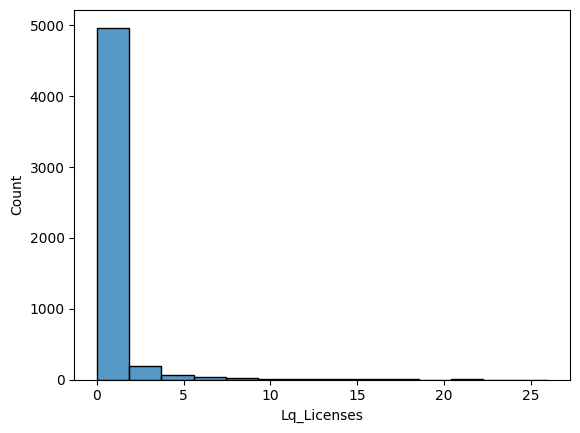

In [ ]:
#Histogram for Liquor Venues
sns.histplot(data=blackspots, x='Lq_Licenses')

<Axes: xlabel='Lq_Licenses'>

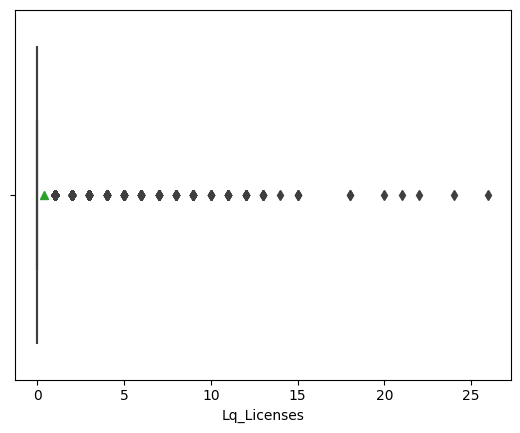

In [ ]:
#Boxplot for Liqour Venues
sns.boxplot(data=blackspots, x='Lq_Licenses', showmeans=True)

In [ ]:
#Mode for Lq license
blackspots['Lq_Licenses'].median()

0.0

As the Liquor Venues is skewed the missing 06 values will be replaced by the median later

Replacing missing values of age 65 and over with median

In [ ]:
blackspots['AGE_65YRS_OVER_PCNT'].fillna(blackspots['AGE_65YRS_OVER_PCNT'].median(),inplace=True)

Replacing missing values of Liquor Venues with median

In [ ]:
blackspots['Lq_Licenses'].fillna(blackspots['Lq_Licenses'].median(),inplace=True)

In [ ]:
#Checking missing values
print(blackspots.isnull().sum().sort_values(ascending=0))

ID                                 0
EZI_ROAD_NAME                      0
OCCUPATION_WHITE_COLLAR_PCNT       0
OCCUPATION_BLUE_COLLAR_PCNT        0
SEIFA                              0
Commercial%                        0
Industrial%                        0
Residential%                       0
Parkland%                          0
Primary_Production%                0
Lq_Licenses                        0
Intersection                       0
Supermarket                        0
primary_school                     0
secondary_school                   0
km_post                            0
traffic_signal                     0
DWELLING_FLAT_UNIT_APART_PCNT      0
DWELLING_SEMID_RO_OR_TCE_H_TH_P    0
DWELLING_SEP_HOUSE_PCNT            0
AGE_18YRS_OVER_PCNT                0
ROAD_NAME                          0
ROAD_TYPE                          0
AGE_LESS_THAN_15YRS_PCNT           0
AGE_15_24YRS_PCNT                  0
AGE_25_44YRS_PCNT                  0
AGE_45_64YRS_PCNT                  0
A

In [ ]:
#converting number of liquor venues from float to integer
blackspots['Lq_Licenses'] = blackspots['Lq_Licenses'].astype(int)

In [ ]:
blackspots['Lq_Licenses'].dtypes

dtype('int64')

**Descriptive statistics and Univariate analysis**

In [ ]:
#set the formatting for floating numbers to display 3 decimal points
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#summarise categorical columns as well
data_types =['object', 'float', 'int']
blackspots.describe(include=data_types)

ID EZI_ROAD_NAME ROAD_NAME ROAD_TYPE  AGE_LESS_THAN_15YRS_PCNT  \
count  5326.000          5326      5326      5326                  5326.000   
unique      NaN          2185      2020         6                       NaN   
top         NaN  BASS HIGHWAY   PRINCES      ROAD                       NaN   
freq        NaN            52        75      3400                       NaN   
mean   4996.381           NaN       NaN       NaN                     0.175   
std    2885.736           NaN       NaN       NaN                     0.051   
min       1.000           NaN       NaN       NaN                     0.000   
25%    2477.000           NaN       NaN       NaN                     0.145   
50%    5020.500           NaN       NaN       NaN                     0.177   
75%    7478.750           NaN       NaN       NaN                     0.206   
max    9999.000           NaN       NaN       NaN                     0.329   

        AGE_15_24YRS_PCNT  AGE_25_44YRS_PCNT  AGE_45_64YRS_PCNT  \
count            5326.000           5326.000           5326.000   
unique                NaN                NaN                NaN   
top                   NaN                NaN                NaN   
freq                  NaN                NaN                NaN   
mean                0.100              0.203              0.307   
std                 0.031              0.055              0.068   
min                 0.000              0.000              0.000   
25%                 0.080              0.172              0.274   
50%                 0.102              0.197              0.317   
75%                 0.123              0.234              0.348   
max                 0.198              0.609              0.491   

        AGE_18YRS_OVER_PCNT  AGE_65YRS_OVER_PCNT  SEO_PERSONS_PCNT  \
count              5326.000             5326.000          5326.000   
unique                  NaN                  NaN               NaN   
top                     NaN                  NaN               NaN   
freq                    NaN                  NaN               NaN   
mean                  0.774                0.202             0.885   
std                   0.102                0.105             0.107   
min                   0.000                0.000             0.000   
25%                   0.752                0.149             0.871   
50%                   0.779                0.181             0.897   
75%                   0.816                0.237             0.928   
max                   1.000                1.000             1.000   

        FC_COUPLE_NO_CHILDREN_PCNT  FC_COUPLE_WITH_CHILDREN_PCNT  \
count                     5326.000                      5326.000   
unique                         NaN                           NaN   
top                            NaN                           NaN   
freq                           NaN                           NaN   
mean                         0.444                         0.401   
std                          0.106                         0.115   
min                          0.000                         0.000   
25%                          0.387                         0.342   
50%                          0.450                         0.407   
75%                          0.500                         0.477   
max                          1.088                         0.786   

        FC_SINGLE_PARENT  CARS_ZERO_HH_PCNT  CARS_ONE_HH_PCNT  \
count           5326.000           5326.000          5326.000   
unique               NaN                NaN               NaN   
top                  NaN                NaN               NaN   
freq                 NaN                NaN               NaN   
mean               0.127              0.027             0.253   
std                0.066              0.037             0.125   
min                0.000              0.000             0.000   
25%                0.077              0.000             0.156   
50%             

Univariate analysis -
Visualising the distribution of Numeric Variables with histograms

Numerical Variables: ['ID', 'AGE_LESS_THAN_15YRS_PCNT', 'AGE_15_24YRS_PCNT', 'AGE_25_44YRS_PCNT', 'AGE_45_64YRS_PCNT', 'AGE_18YRS_OVER_PCNT', 'AGE_65YRS_OVER_PCNT', 'SEO_PERSONS_PCNT', 'FC_COUPLE_NO_CHILDREN_PCNT', 'FC_COUPLE_WITH_CHILDREN_PCNT', 'FC_SINGLE_PARENT', 'CARS_ZERO_HH_PCNT', 'CARS_ONE_HH_PCNT', 'CARS_TWO_OR_MORE_HH_PCNT', 'DWELLING_SEP_HOUSE_PCNT', 'DWELLING_SEMID_RO_OR_TCE_H_TH_P', 'DWELLING_FLAT_UNIT_APART_PCNT', 'OCCUPATION_WHITE_COLLAR_PCNT', 'OCCUPATION_BLUE_COLLAR_PCNT', 'SEIFA', 'Commercial%', 'Industrial%', 'Residential%', 'Parkland%', 'Primary_Production%', 'Lq_Licenses', 'Supermarket', 'primary_school', 'secondary_school', 'km_post', 'traffic_signal']


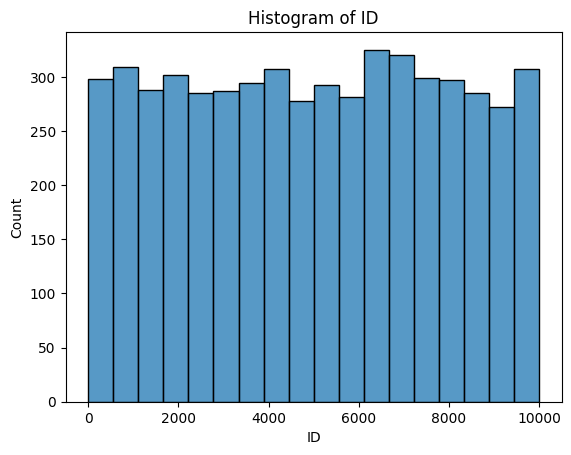

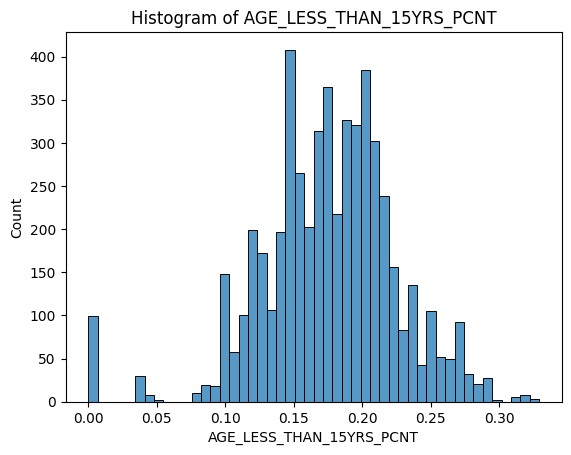

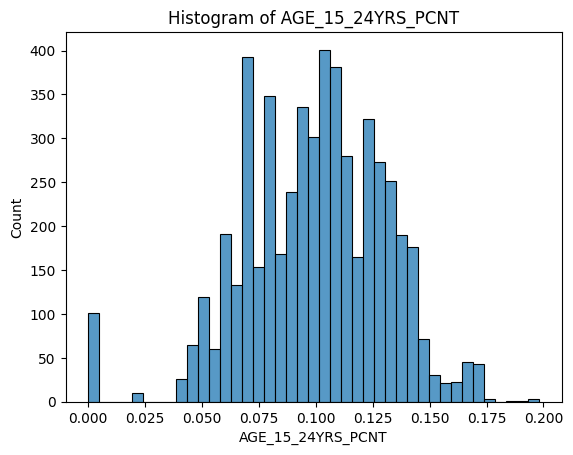

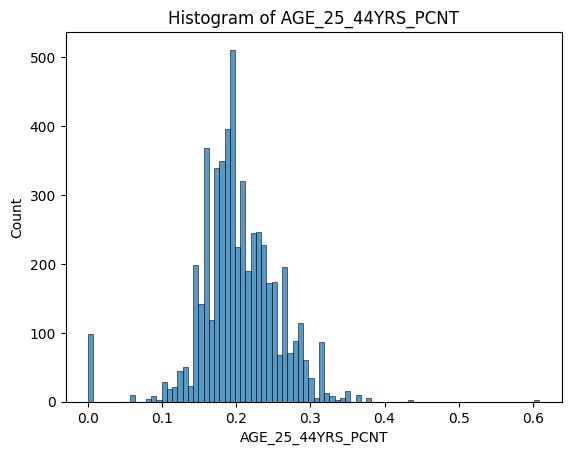

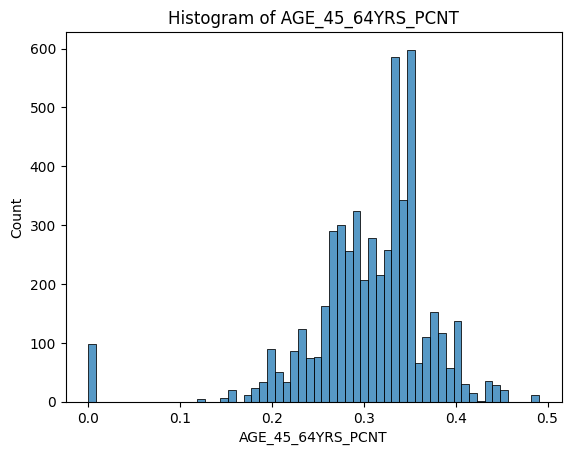

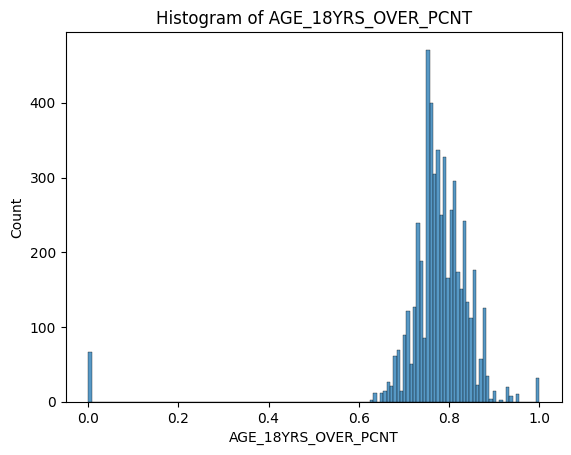

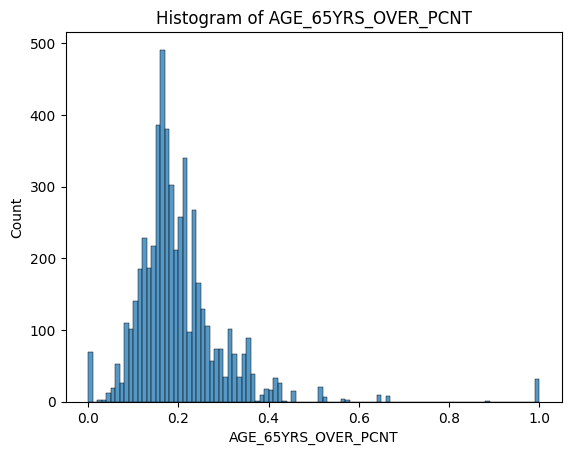

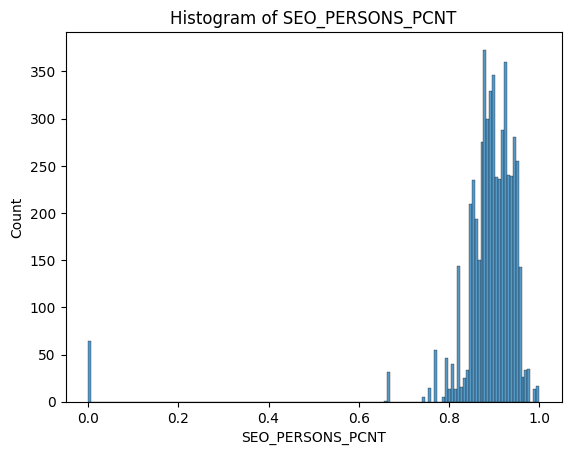

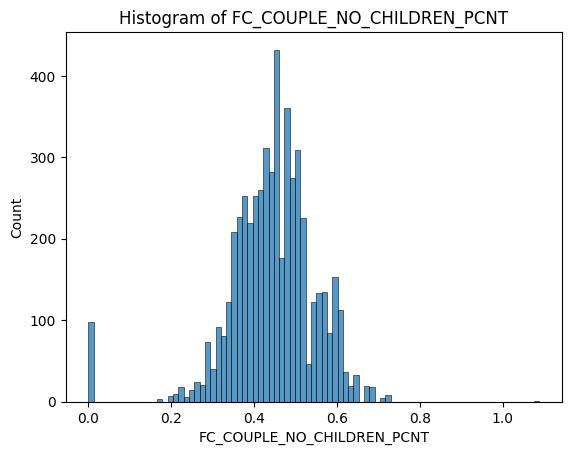

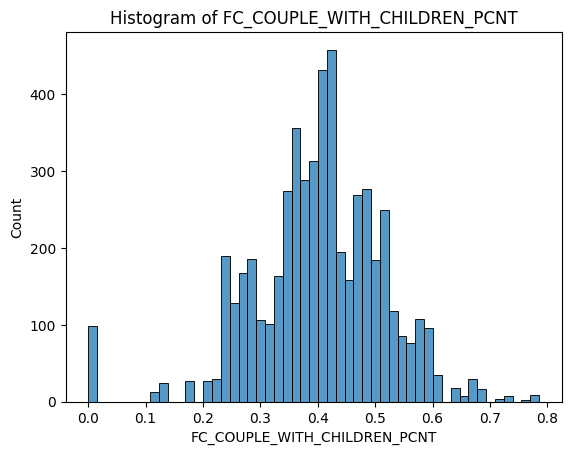

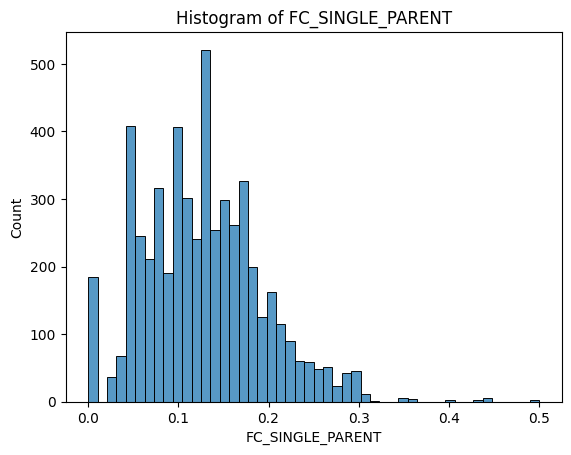

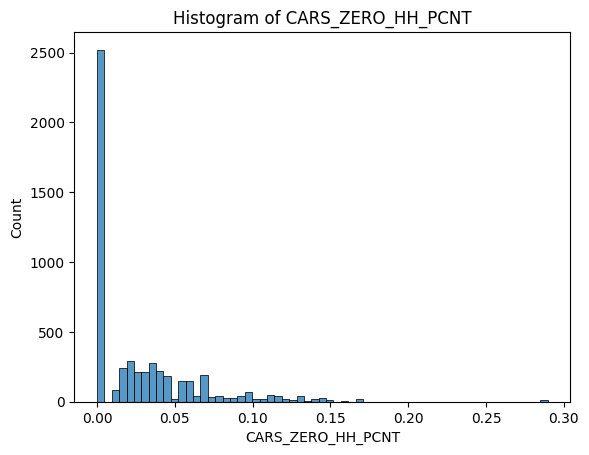

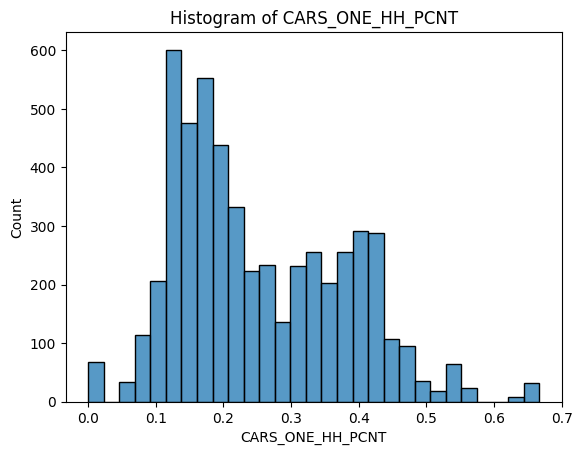

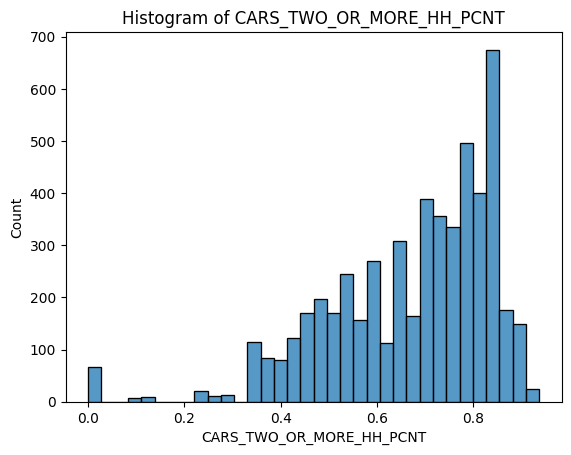

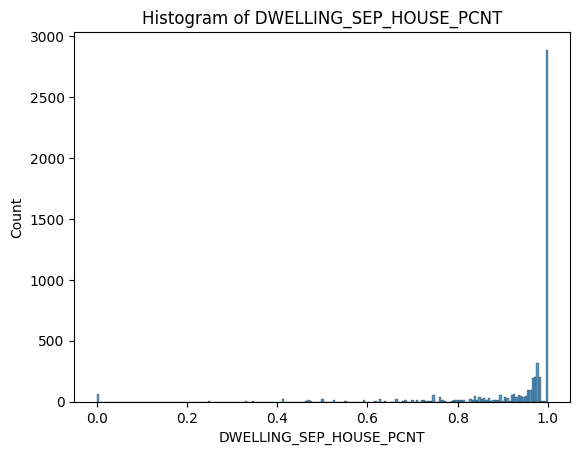

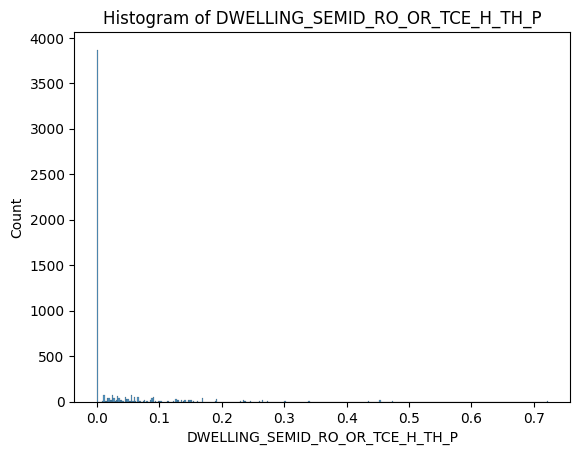

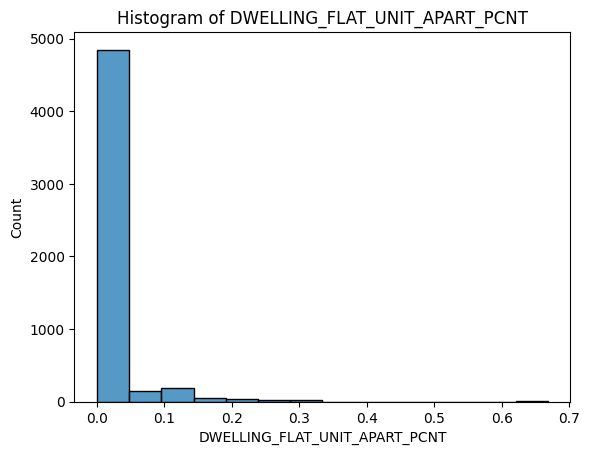

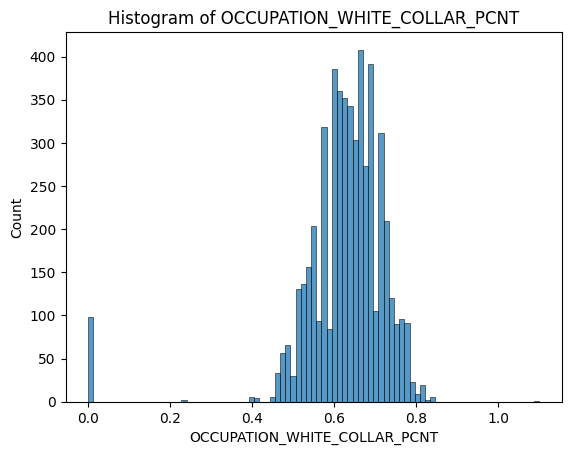

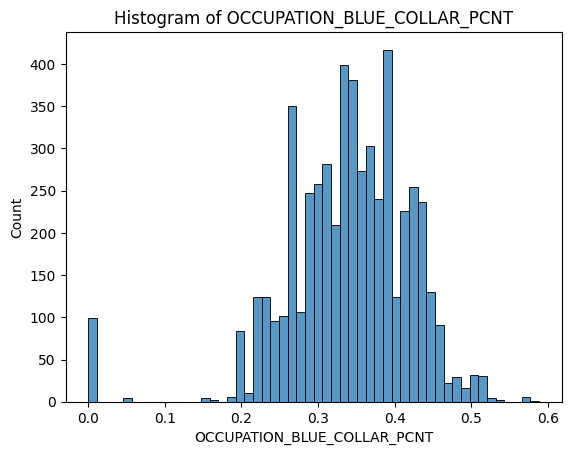

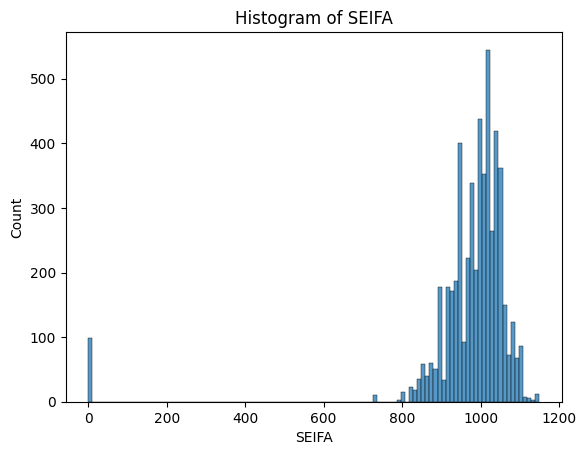

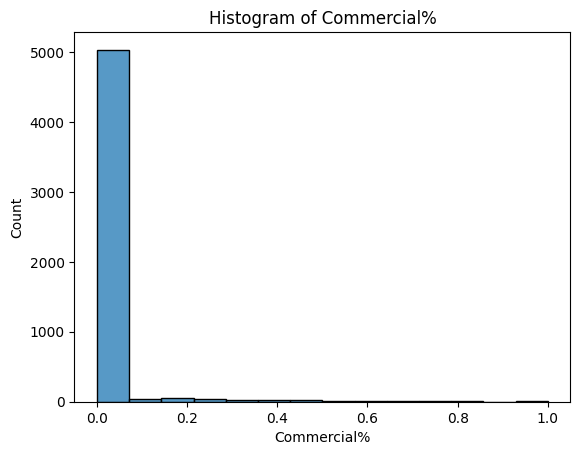

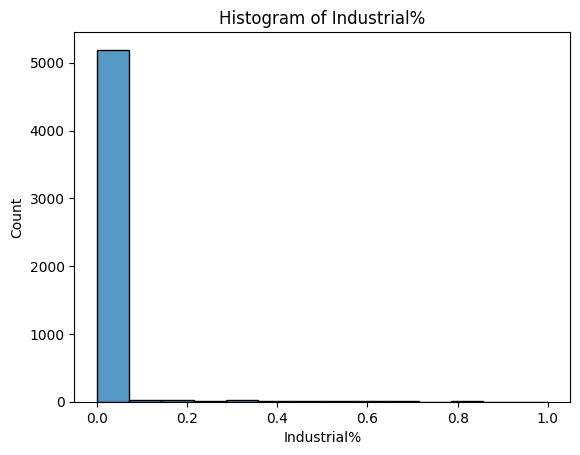

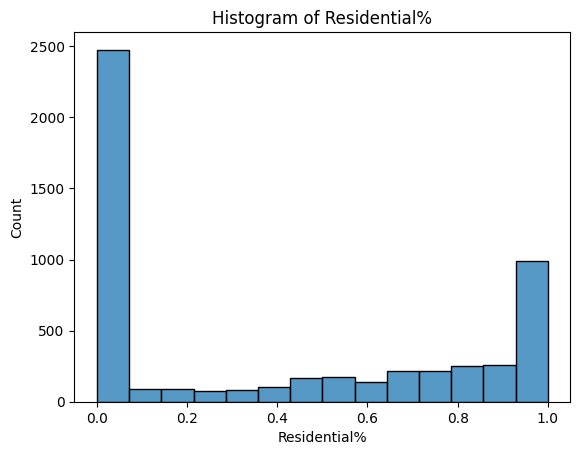

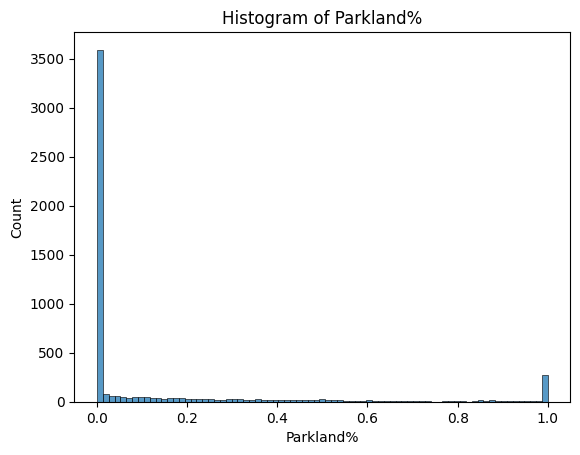

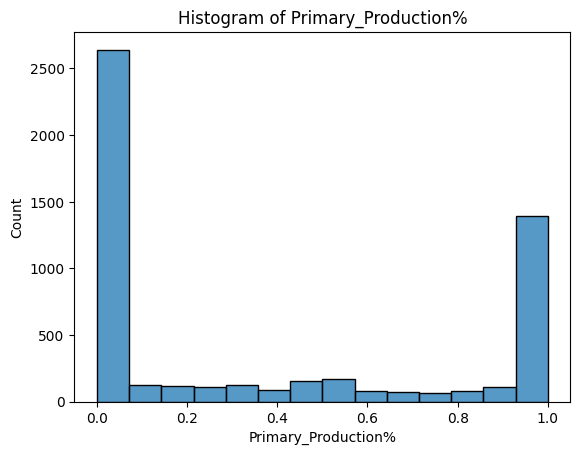

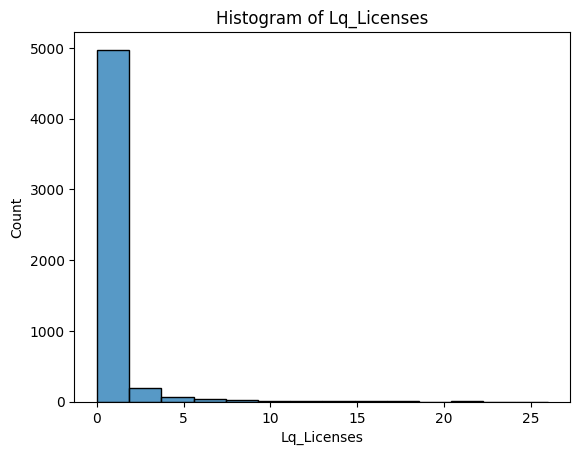

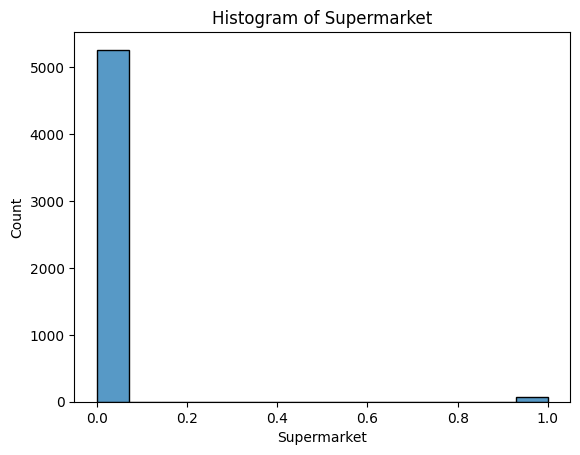

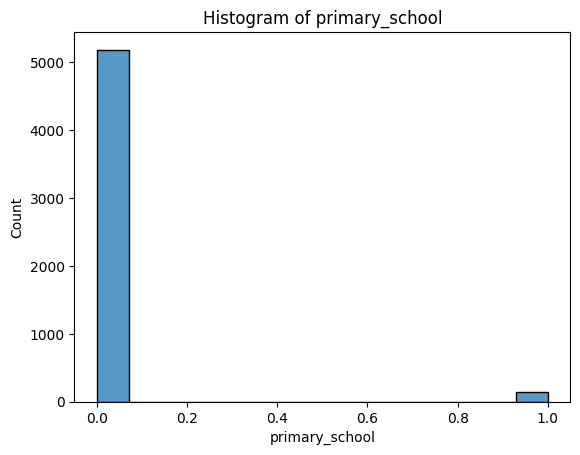

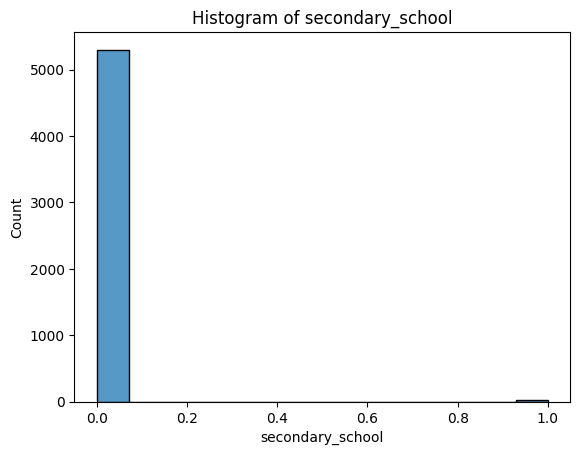

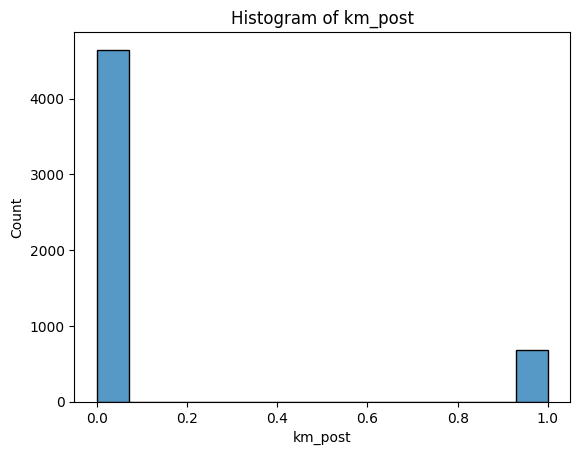

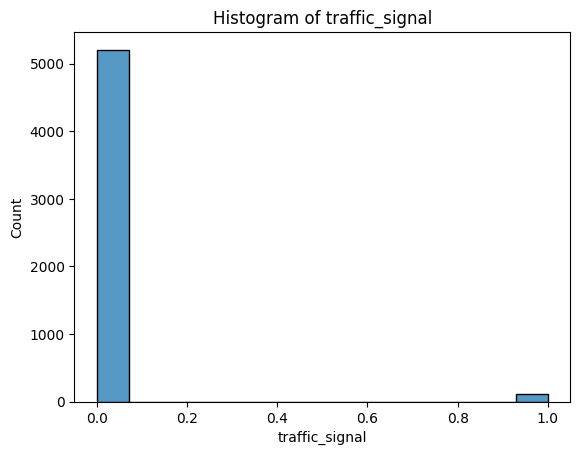

In [ ]:

# Numerical Variables
numerical_variables = blackspots.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print the list of numerical variables
print("Numerical Variables:", numerical_variables)

# Display histograms using seaborn
for variable in numerical_variables:
    sns.histplot(data=blackspots, x=variable)
    plt.title(f"Histogram of {variable}")
    plt.show()

Visualising Numeric variables with Boxplots

Numerical Variables: ['ID', 'AGE_LESS_THAN_15YRS_PCNT', 'AGE_15_24YRS_PCNT', 'AGE_25_44YRS_PCNT', 'AGE_45_64YRS_PCNT', 'AGE_18YRS_OVER_PCNT', 'AGE_65YRS_OVER_PCNT', 'SEO_PERSONS_PCNT', 'FC_COUPLE_NO_CHILDREN_PCNT', 'FC_COUPLE_WITH_CHILDREN_PCNT', 'FC_SINGLE_PARENT', 'CARS_ZERO_HH_PCNT', 'CARS_ONE_HH_PCNT', 'CARS_TWO_OR_MORE_HH_PCNT', 'DWELLING_SEP_HOUSE_PCNT', 'DWELLING_SEMID_RO_OR_TCE_H_TH_P', 'DWELLING_FLAT_UNIT_APART_PCNT', 'OCCUPATION_WHITE_COLLAR_PCNT', 'OCCUPATION_BLUE_COLLAR_PCNT', 'SEIFA', 'Commercial%', 'Industrial%', 'Residential%', 'Parkland%', 'Primary_Production%', 'Lq_Licenses', 'Supermarket', 'primary_school', 'secondary_school', 'km_post', 'traffic_signal']


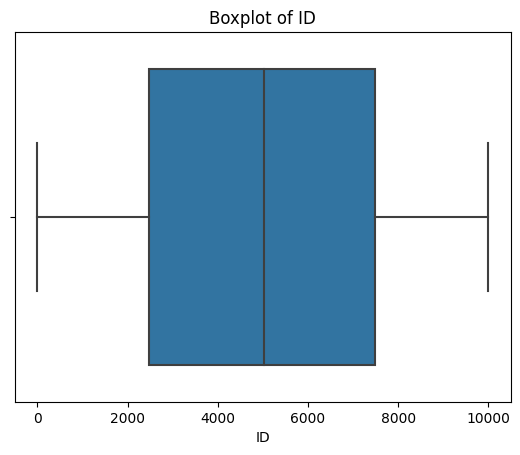

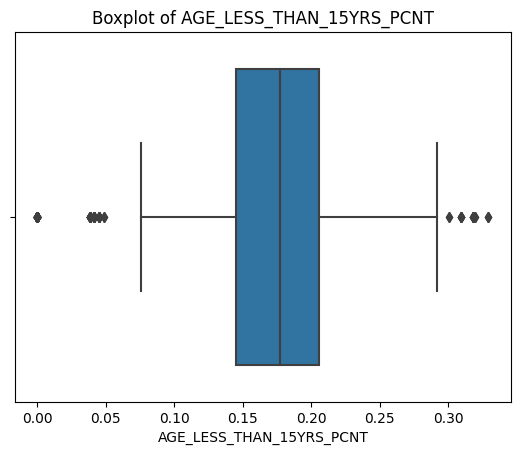

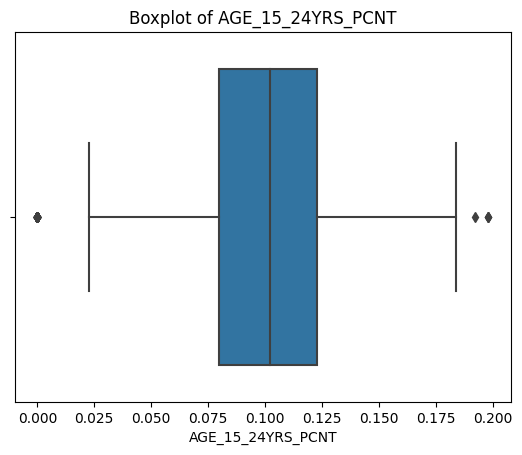

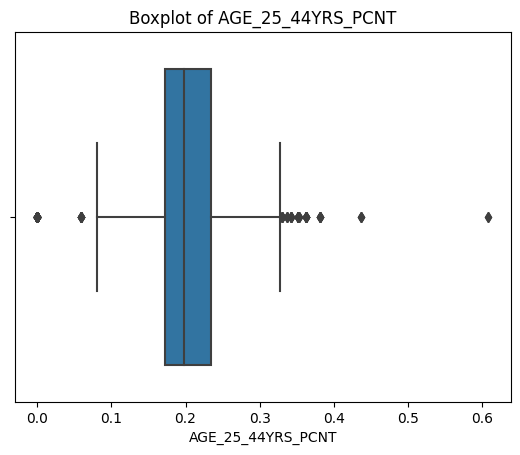

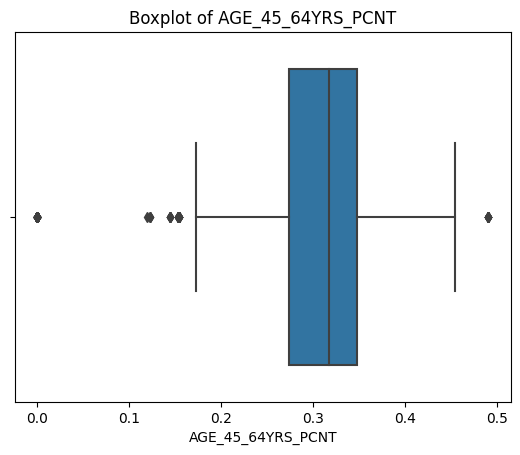

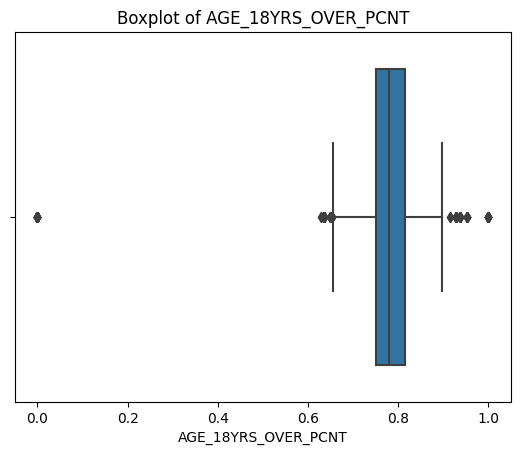

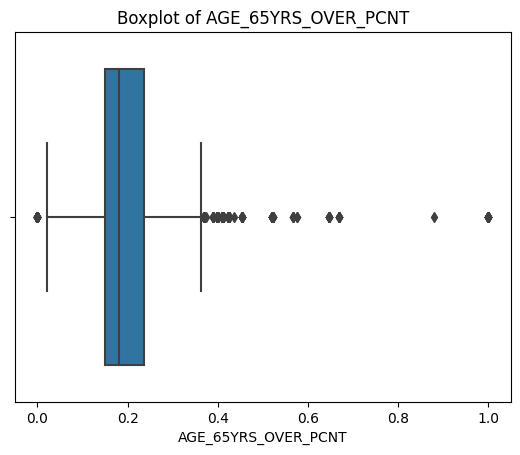

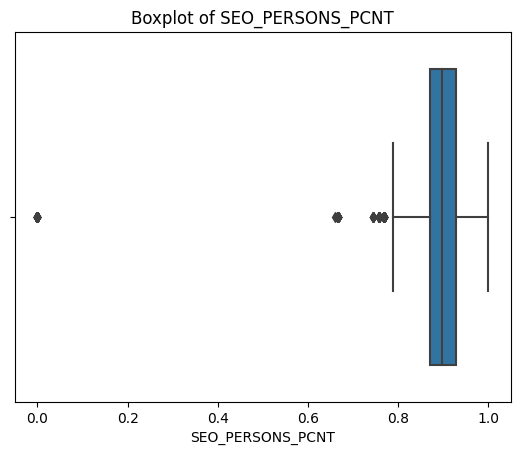

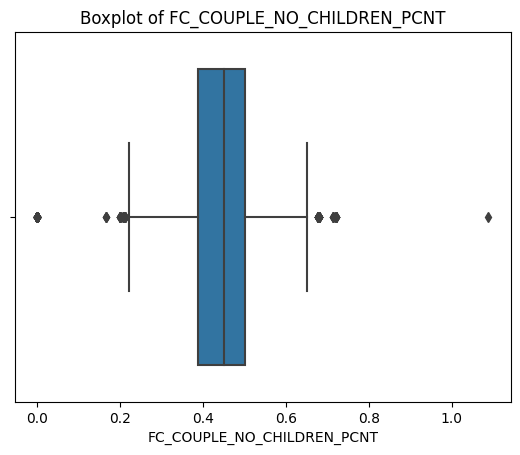

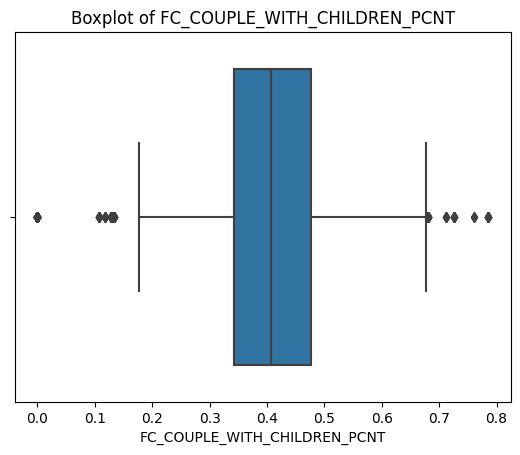

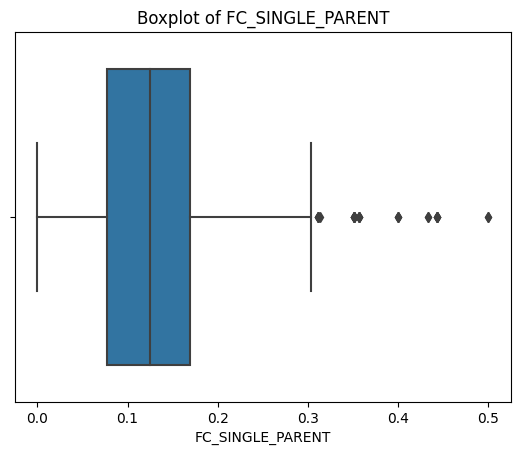

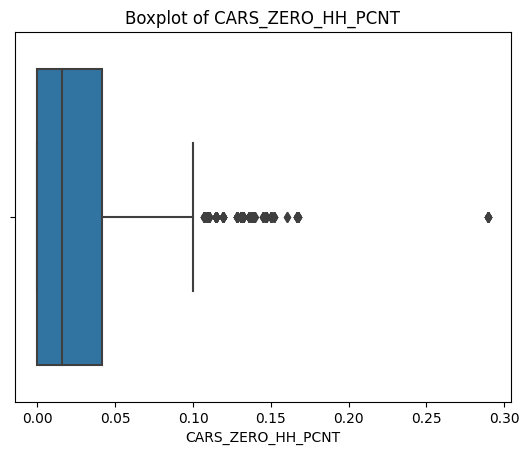

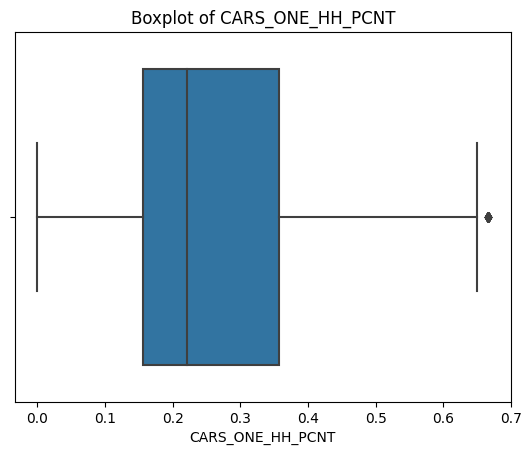

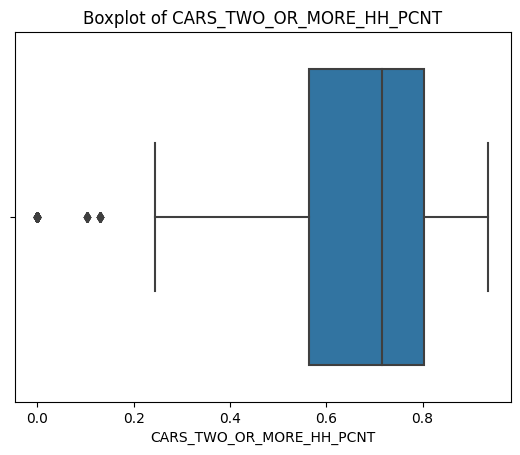

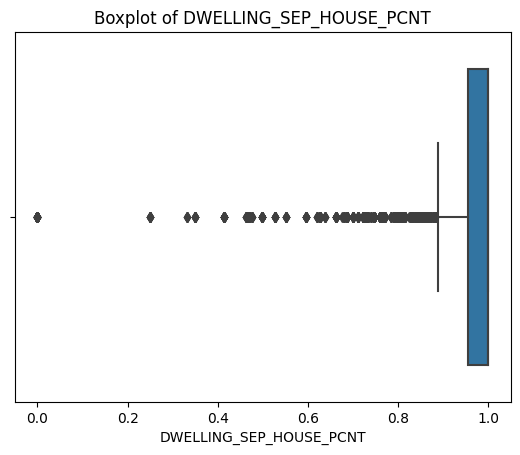

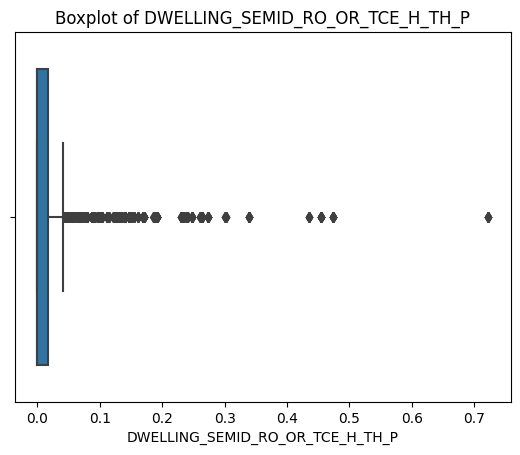

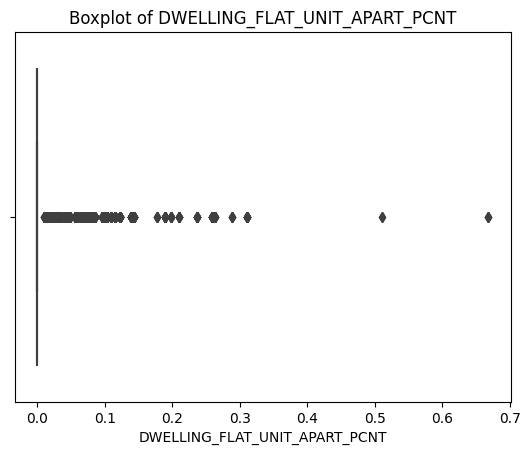

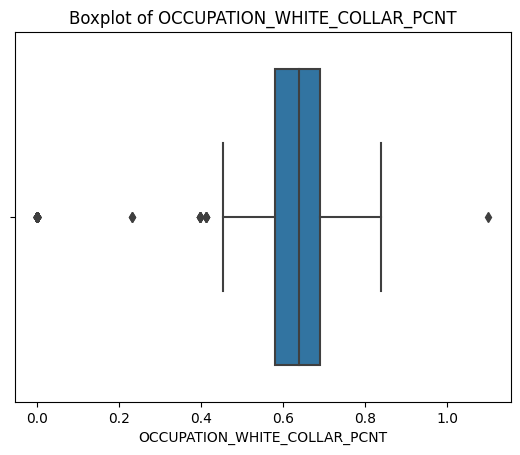

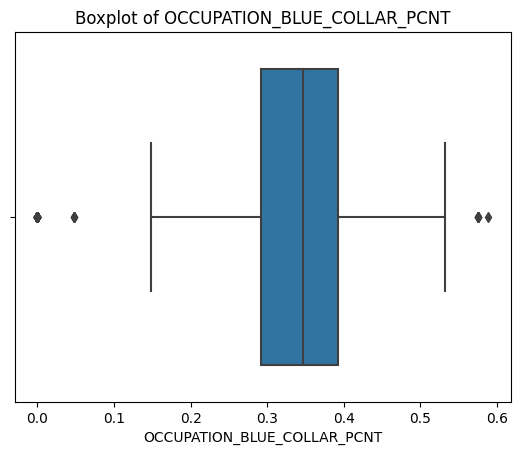

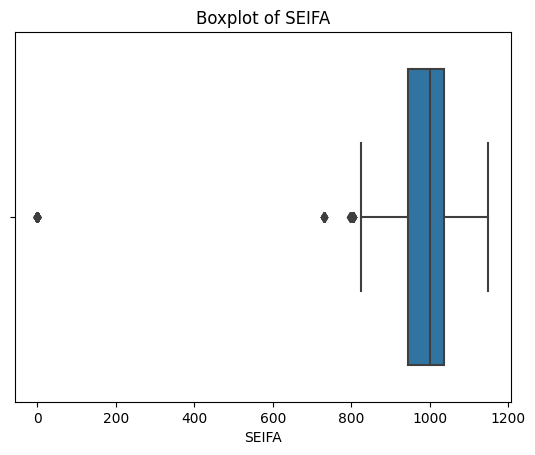

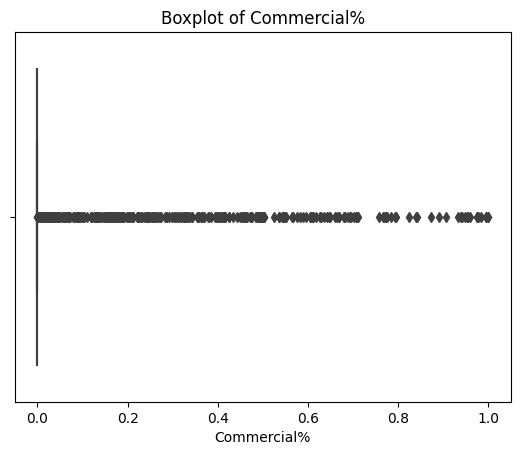

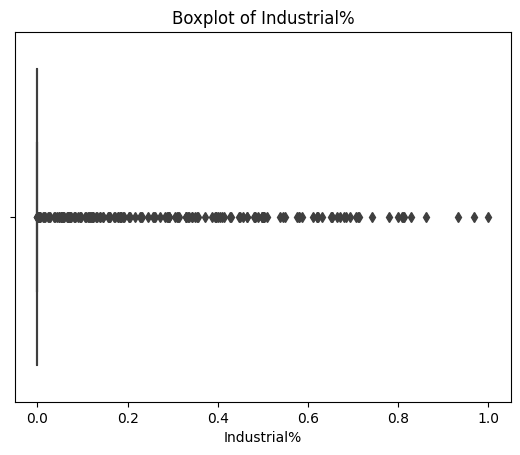

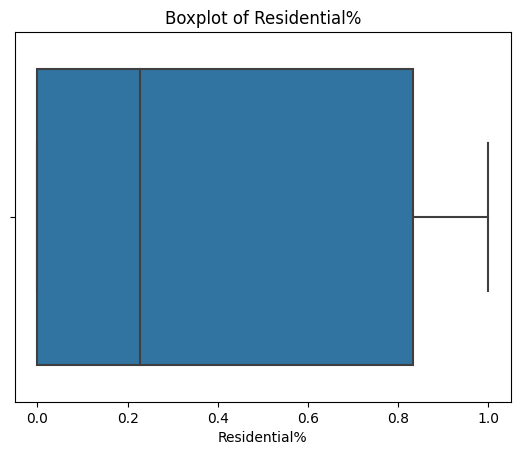

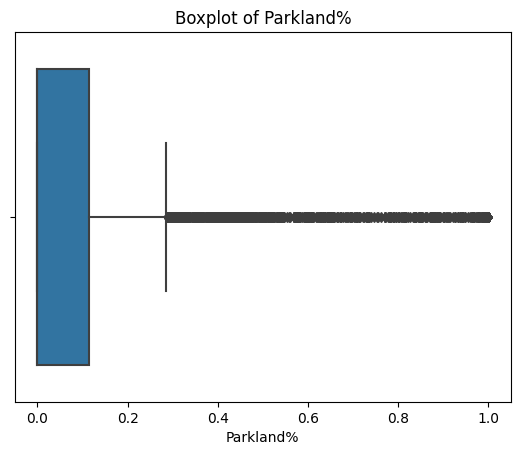

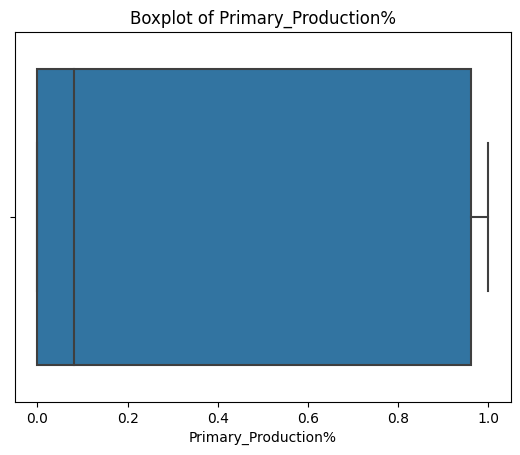

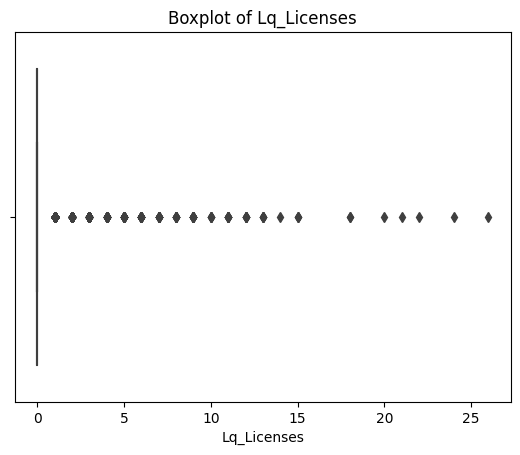

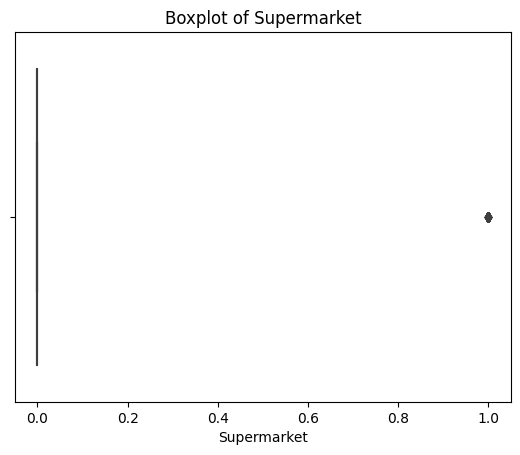

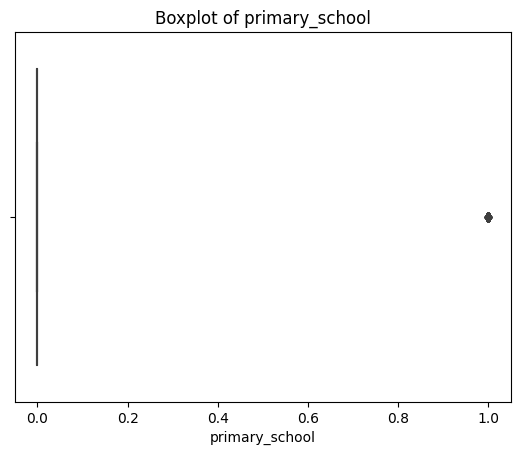

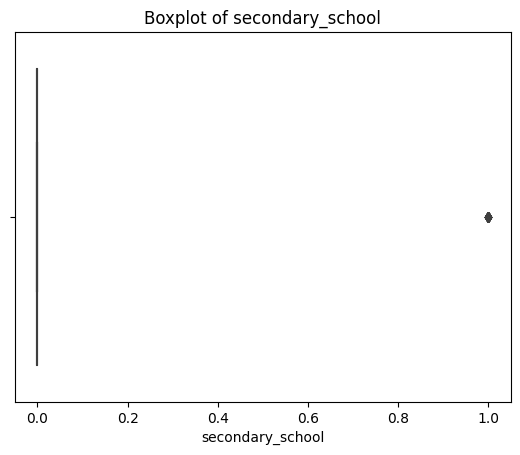

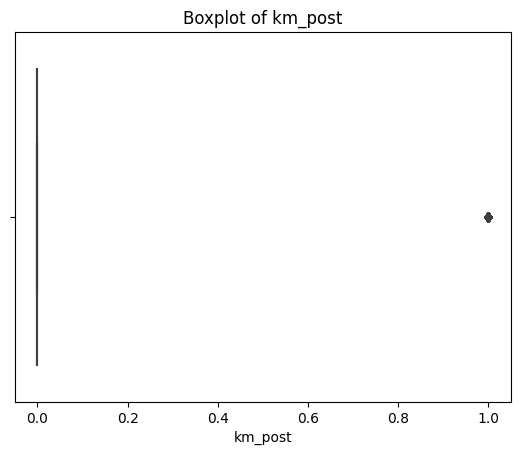

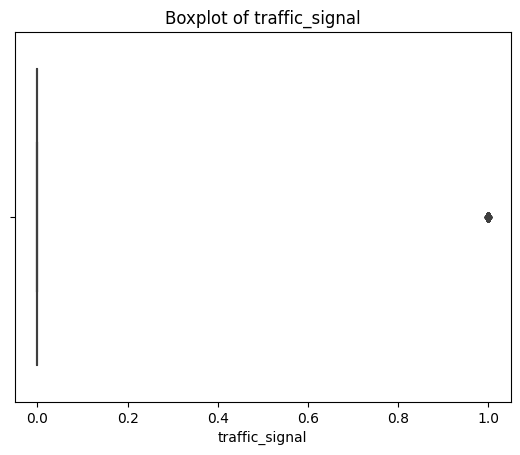

In [ ]:

# Numerical Variables
numerical_variables = blackspots.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print the list of numerical variables
print("Numerical Variables:", numerical_variables)

# Display Boxplot using seaborn
for variable in numerical_variables:
    sns.boxplot(data=blackspots, x=variable)
    plt.title(f"Boxplot of {variable}")
    plt.show()


Univariate Analysis - Visualising the distribution of Categorical Variables using Bar Charts

categorical Variables: ['EZI_ROAD_NAME', 'ROAD_NAME', 'ROAD_TYPE', 'Intersection', 'Blackspot']


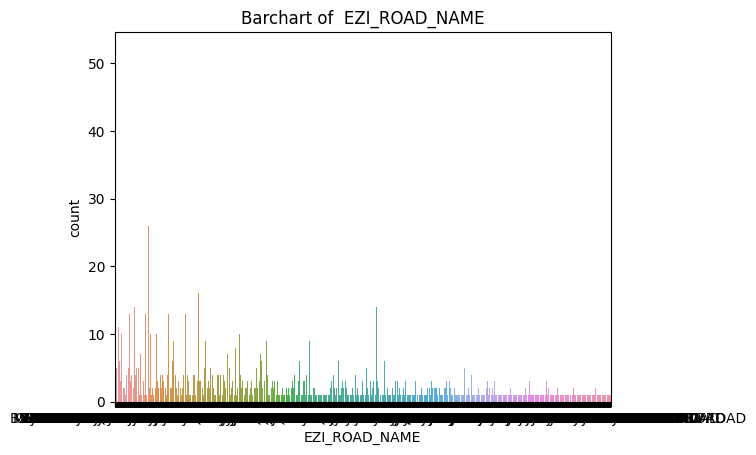

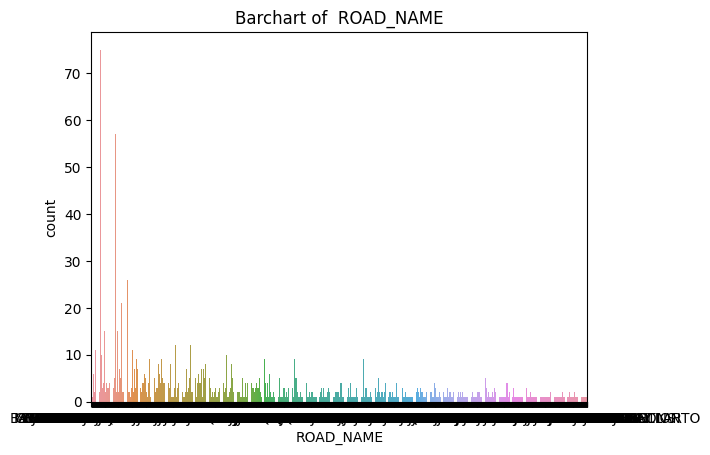

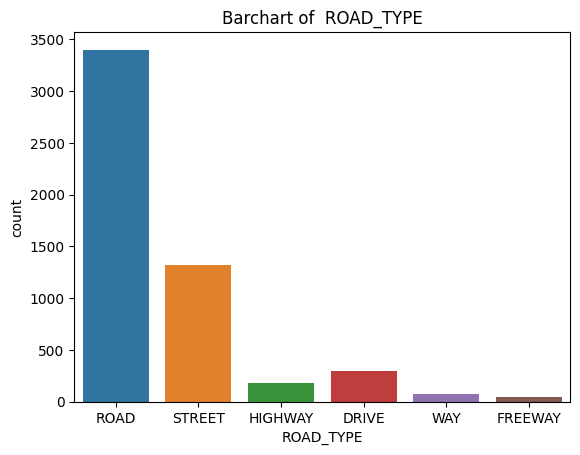

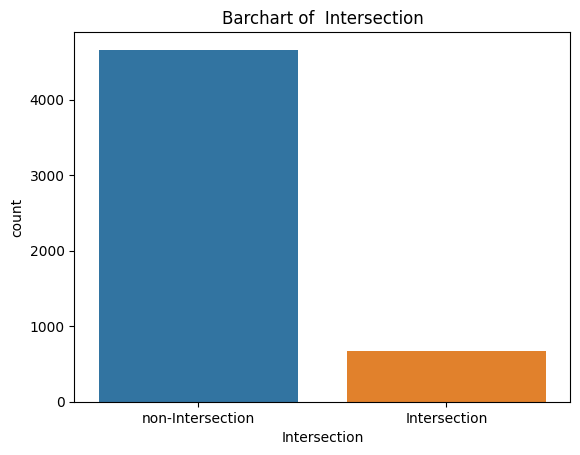

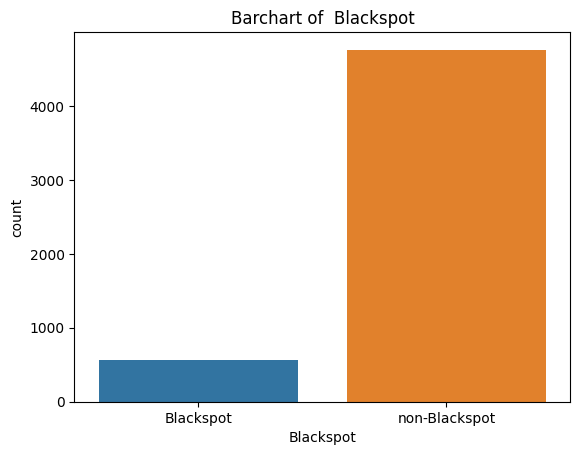

In [ ]:

# Categorical Variables
categorical_variables = blackspots.select_dtypes(include=['object']).columns.tolist()

# Print the list of numerical variables
print("categorical Variables:", categorical_variables)

# Display barcharts of categorical variables using seaborn
for variable in categorical_variables:
    sns.countplot(data=blackspots, x=variable)
    plt.title(f"Barchart of  {variable}")
    plt.show()

Removing Columns

*   ID - Because it has no impact to the outcome of whether the segment is a black spot ot not
*   EZI Road Name - The column has very little amount of unique data. The most important facts which can be found from this column is the type of the road and it can be found in the Road type column.
*   Road Name - No relation to the blackspot detection.






In [ ]:
columns_to_delete = ['ID', 'EZI_ROAD_NAME', 'ROAD_NAME']
blackspots.drop(columns_to_delete, axis=1, inplace=True)

In [ ]:
#After Deleting Columns
blackspots.head()

ROAD_TYPE  AGE_LESS_THAN_15YRS_PCNT  AGE_15_24YRS_PCNT  AGE_25_44YRS_PCNT  \
0      ROAD                     0.122              0.059              0.229   
1      ROAD                     0.216              0.142              0.313   
2      ROAD                     0.185              0.102              0.195   
3    STREET                     0.168              0.062              0.286   
4      ROAD                     0.201              0.108              0.204   

   AGE_45_64YRS_PCNT  AGE_18YRS_OVER_PCNT  AGE_65YRS_OVER_PCNT  \
0              0.270                0.854                0.321   
1              0.201                0.742                0.128   
2              0.348                0.757                0.169   
3              0.322                0.816                0.161   
4              0.341                0.762                0.146   

   SEO_PERSONS_PCNT  FC_COUPLE_NO_CHILDREN_PCNT  FC_COUPLE_WITH_CHILDREN_PCNT  \
0             0.769                       0.576                         0.303   
1             0.798                       0.402                         0.519   
2             0.950                       0.505                         0.361   
3             0.819                       0.455                         0.364   
4             0.852                       0.432                         0.484   

   FC_SINGLE_PARENT  CARS_ZERO_HH_PCNT  CARS_ONE_HH_PCNT  \
0             0.076              0.068             0.429   
1             0.126              0.011             0.225   
2             0.103              0.000             0.178   
3             0.227              0.055             0.373   
4             0.053              0.000             0.115   

   CARS_TWO_OR_MORE_HH_PCNT  DWELLING_SEP_HOUSE_PCNT  \
0                     0.461                    0.745   
1                     0.721                    1.000   
2                     0.785                    1.000   
3                     0.545                    1.000   
4                     0.885                    1.000   

   DWELLING_SEMID_RO_OR_TCE_H_TH_P  DWELLING_FLAT_UNIT_APART_PCNT  \
0                            0.059                          0.123   
1                            0.000                          0.000   
2                            0.000                          0.000   
3                            0.000                          0.000   
4                            0.000                          0.000   

   OCCUPATION_WHITE_COLLAR_PCNT  OCCUPATION_BLUE_COLLAR_PCNT  SEIFA  \
0                         0.695                        0.284   1037   
1                         0.714                        0.266   1032   
2                         0.641                        0.305   1001   
3                         0.720                        0.312    998   
4                         0.689                        0.329   1049   

   Commercial%  Industrial%  Residential%  Parkland%  Primary_Production%  \
0        0.244        0.000         0.267      0.358                0.000   
1        0.000        0.000         0.000      0.000                1.000   
2        0.000        0.000         0.000      1.000                0.000   
3        0.000        0.000         0.963      0.037                0.000   
4        0.000        0.000         0.000      0.000                1.000   

   Lq_Licenses      Intersection  Supermarket  primary_school  \
0           14  non-Intersection            0               0   
1            0      Intersection            0               0   
2            0  non-Intersection            0               0   
3            0  non-Intersection            0               0   
4            0  non-Intersection            0               0   

   secondary_school  km_post  traffic_signal      Blackspot  
0                 0        0               0      Blackspot  
1                 0        1               0      Blackspot  
2                 0        0               0  non-Blackspot  
3

**Converting Categorical Variables to Numerical Variables through dummy coding**

In [ ]:
#EDA for Intersection
blackspots['Intersection'].value_counts()

non-Intersection    4659
Intersection         667
Name: Intersection, dtype: int64

<Axes: xlabel='Intersection', ylabel='count'>

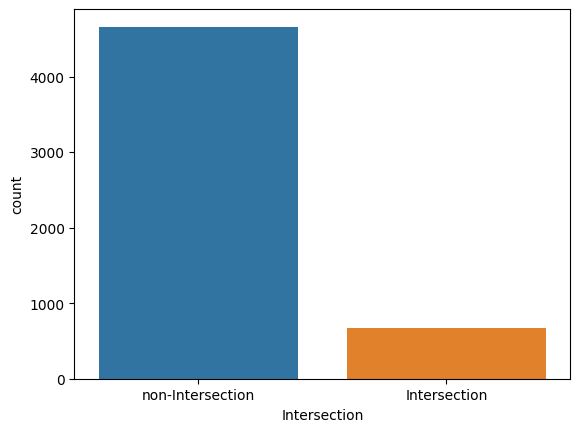

In [ ]:
sns.countplot(x=blackspots['Intersection'])

In [ ]:
#Converting Intersection to Numeric through dummy coding
blackspots.Intersection = blackspots.Intersection.replace({'non-Intersection':0, 'Intersection':1})

In [ ]:
#EDA for Blackspot column
blackspots['Blackspot'].value_counts()

non-Blackspot    4759
Blackspot         567
Name: Blackspot, dtype: int64

In [ ]:
#Converting Blackspot to Numeric through dummy coding
blackspots.Blackspot = blackspots.Blackspot.replace({'non-Blackspot':0, 'Blackspot':1})

In [ ]:
#EDA for Road Type
blackspots['ROAD_TYPE'].value_counts()

ROAD       3400
STREET     1324
DRIVE       295
HIGHWAY     180
WAY          77
FREEWAY      50
Name: ROAD_TYPE, dtype: int64

In [ ]:
#Converting Road Types to Numeric through dummy coding
blackspots.ROAD_TYPE = blackspots.ROAD_TYPE.replace({'ROAD':0, 'STREET':1, 'DRIVE': 2,'HIGHWAY':3,'WAY':4,'FREEWAY':5})

<Axes: xlabel='ROAD_TYPE', ylabel='count'>

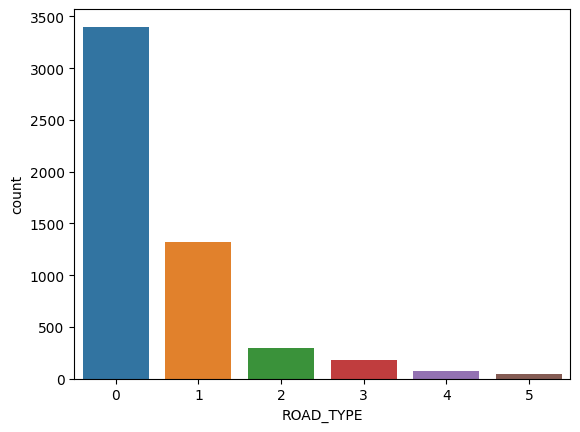

In [ ]:
sns.countplot(x=blackspots['ROAD_TYPE'])#checking distribution of the road type after dummy coding

In [ ]:
#Checking data type and head after numeric conversion
blackspots.dtypes

ROAD_TYPE                            int64
AGE_LESS_THAN_15YRS_PCNT           float64
AGE_15_24YRS_PCNT                  float64
AGE_25_44YRS_PCNT                  float64
AGE_45_64YRS_PCNT                  float64
AGE_18YRS_OVER_PCNT                float64
AGE_65YRS_OVER_PCNT                float64
SEO_PERSONS_PCNT                   float64
FC_COUPLE_NO_CHILDREN_PCNT         float64
FC_COUPLE_WITH_CHILDREN_PCNT       float64
FC_SINGLE_PARENT                   float64
CARS_ZERO_HH_PCNT                  float64
CARS_ONE_HH_PCNT                   float64
CARS_TWO_OR_MORE_HH_PCNT           float64
DWELLING_SEP_HOUSE_PCNT            float64
DWELLING_SEMID_RO_OR_TCE_H_TH_P    float64
DWELLING_FLAT_UNIT_APART_PCNT      float64
OCCUPATION_WHITE_COLLAR_PCNT       float64
OCCUPATION_BLUE_COLLAR_PCNT        float64
SEIFA                                int64
Commercial%                        float64
Industrial%                        float64
Residential%                       float64
Parkland%  

In [ ]:
blackspots.head()

ROAD_TYPE  AGE_LESS_THAN_15YRS_PCNT  AGE_15_24YRS_PCNT  AGE_25_44YRS_PCNT  \
0          0                     0.122              0.059              0.229   
1          0                     0.216              0.142              0.313   
2          0                     0.185              0.102              0.195   
3          1                     0.168              0.062              0.286   
4          0                     0.201              0.108              0.204   

   AGE_45_64YRS_PCNT  AGE_18YRS_OVER_PCNT  AGE_65YRS_OVER_PCNT  \
0              0.270                0.854                0.321   
1              0.201                0.742                0.128   
2              0.348                0.757                0.169   
3              0.322                0.816                0.161   
4              0.341                0.762                0.146   

   SEO_PERSONS_PCNT  FC_COUPLE_NO_CHILDREN_PCNT  FC_COUPLE_WITH_CHILDREN_PCNT  \
0             0.769                       0.576                         0.303   
1             0.798                       0.402                         0.519   
2             0.950                       0.505                         0.361   
3             0.819                       0.455                         0.364   
4             0.852                       0.432                         0.484   

   FC_SINGLE_PARENT  CARS_ZERO_HH_PCNT  CARS_ONE_HH_PCNT  \
0             0.076              0.068             0.429   
1             0.126              0.011             0.225   
2             0.103              0.000             0.178   
3             0.227              0.055             0.373   
4             0.053              0.000             0.115   

   CARS_TWO_OR_MORE_HH_PCNT  DWELLING_SEP_HOUSE_PCNT  \
0                     0.461                    0.745   
1                     0.721                    1.000   
2                     0.785                    1.000   
3                     0.545                    1.000   
4                     0.885                    1.000   

   DWELLING_SEMID_RO_OR_TCE_H_TH_P  DWELLING_FLAT_UNIT_APART_PCNT  \
0                            0.059                          0.123   
1                            0.000                          0.000   
2                            0.000                          0.000   
3                            0.000                          0.000   
4                            0.000                          0.000   

   OCCUPATION_WHITE_COLLAR_PCNT  OCCUPATION_BLUE_COLLAR_PCNT  SEIFA  \
0                         0.695                        0.284   1037   
1                         0.714                        0.266   1032   
2                         0.641                        0.305   1001   
3                         0.720                        0.312    998   
4                         0.689                        0.329   1049   

   Commercial%  Industrial%  Residential%  Parkland%  Primary_Production%  \
0        0.244        0.000         0.267      0.358                0.000   
1        0.000        0.000         0.000      0.000                1.000   
2        0.000        0.000         0.000      1.000                0.000   
3        0.000        0.000         0.963      0.037                0.000   
4        0.000        0.000         0.000      0.000                1.000   

   Lq_Licenses  Intersection  Supermarket  primary_school  secondary_school  \
0           14             0            0               0                 0   
1            0             1            0               0                 0   
2            0             0            0               0                 0   
3            0             0            0               0                 0   
4            0             0            0               0                 0   

   km_post  traffic_signal  Blackspot  
0        0               0          1  
1        1               0          1  
2        0               0          0  


In [ ]:
blackspots.shape[1]

33

Bivariate analysis of variables with the Label attribute (Blackspot)

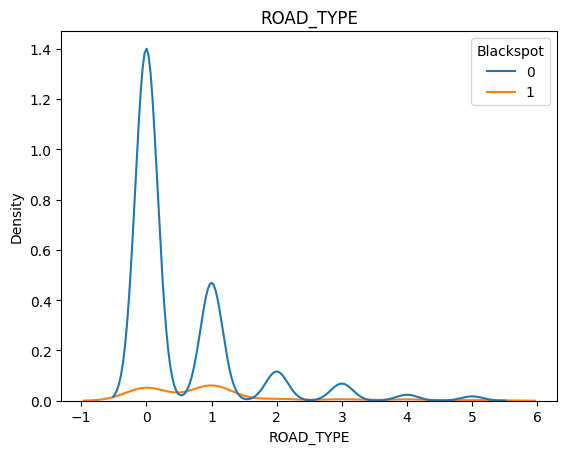

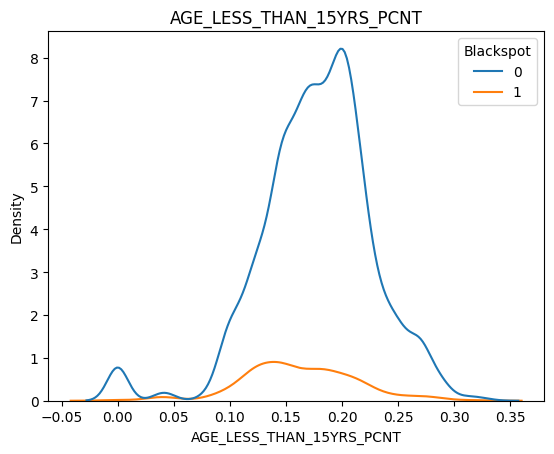

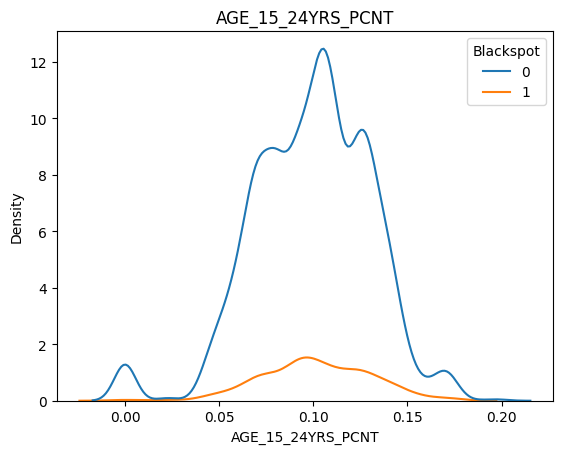

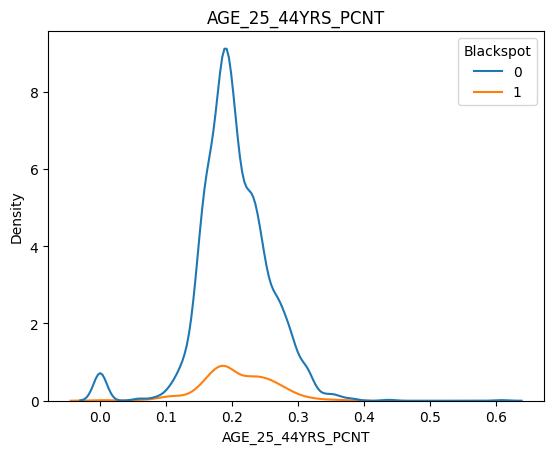

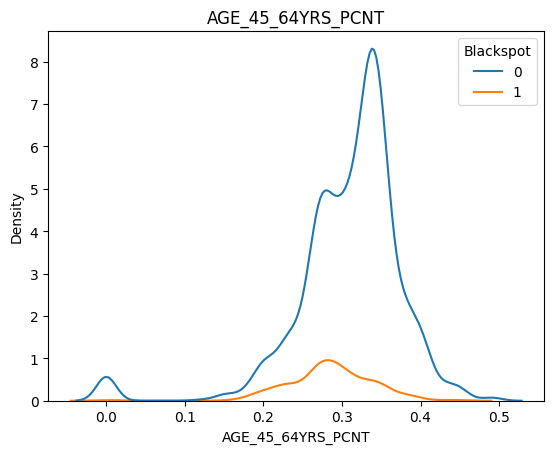

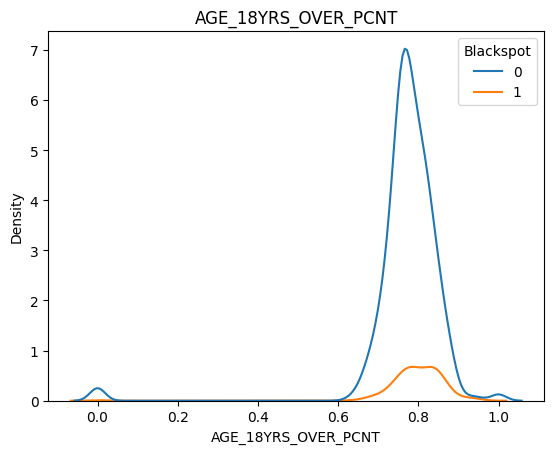

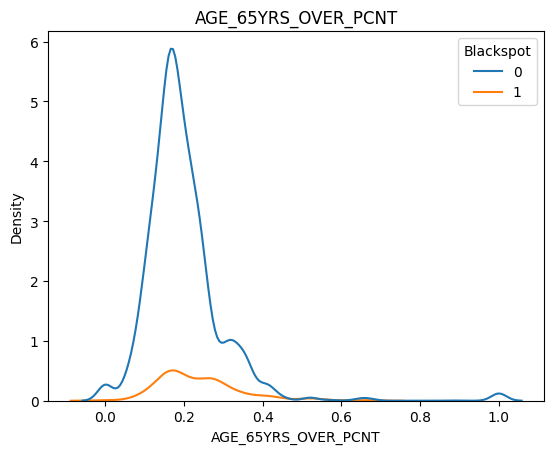

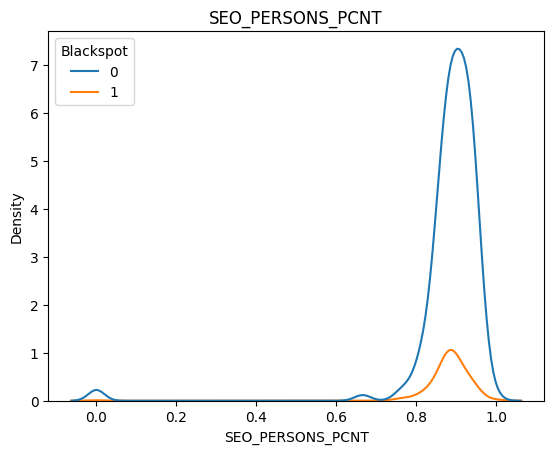

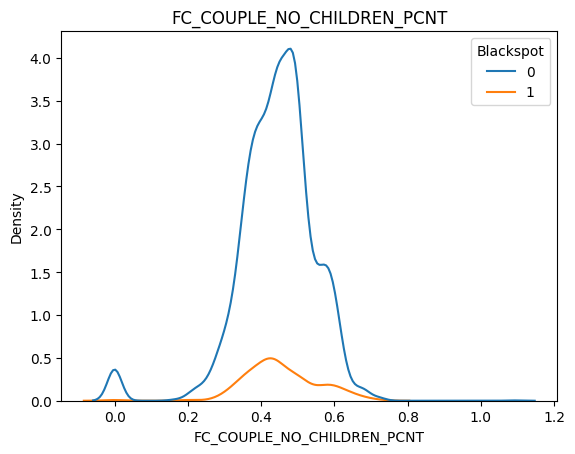

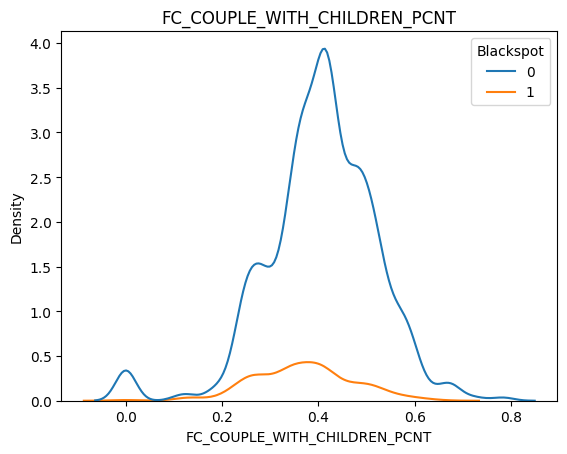

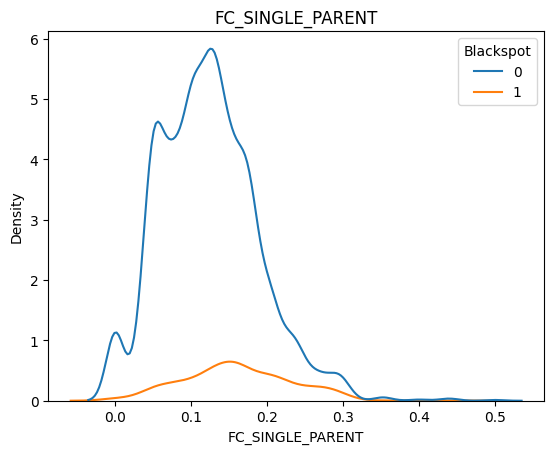

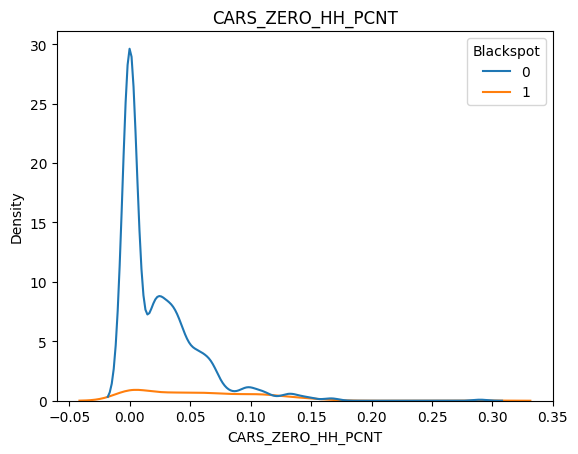

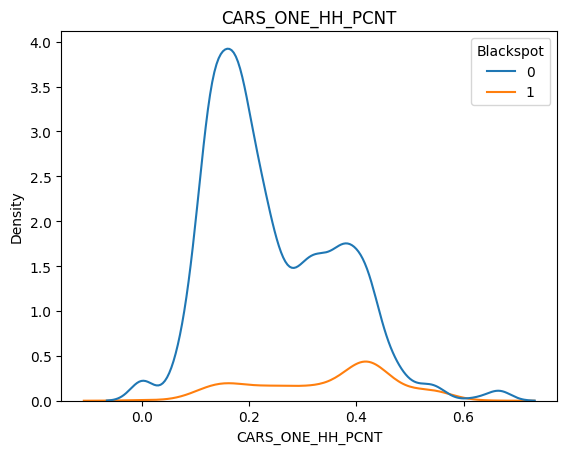

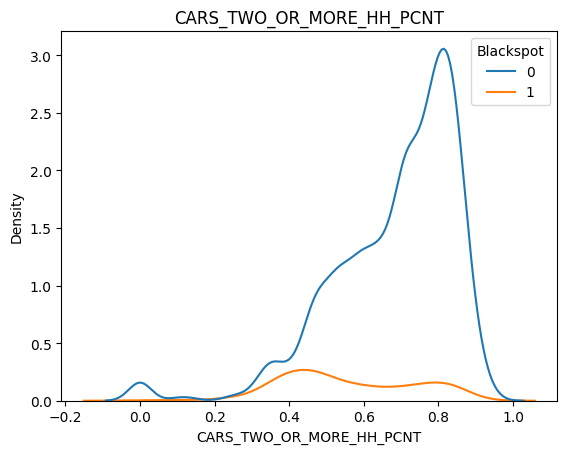

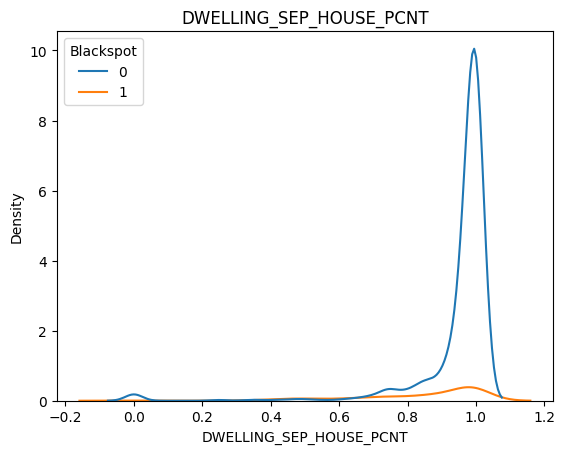

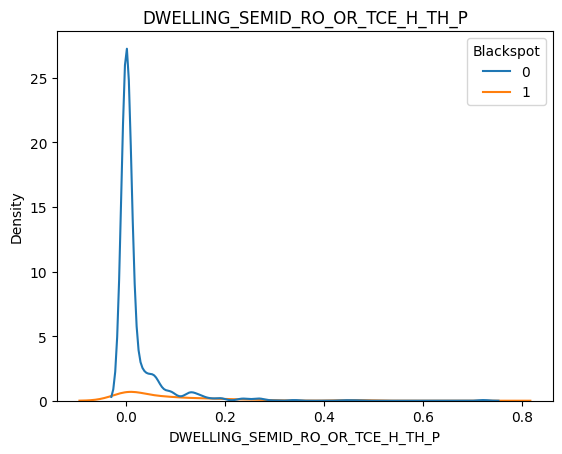

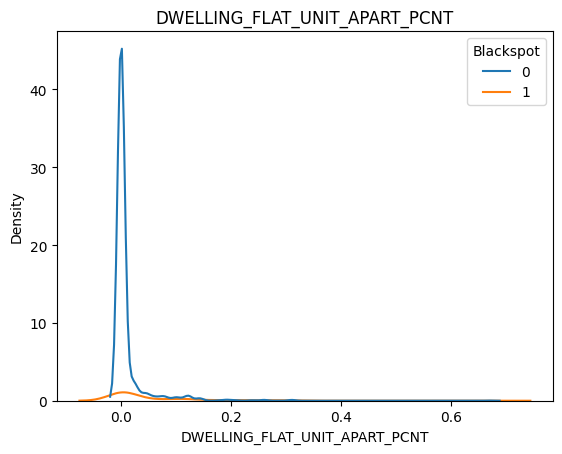

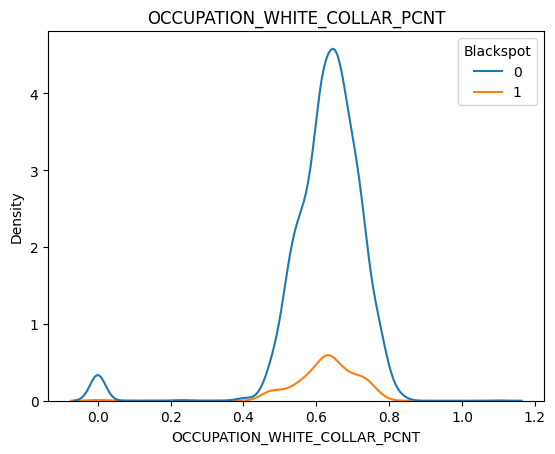

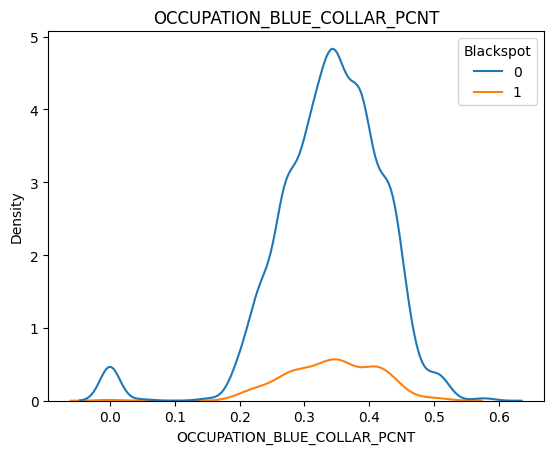

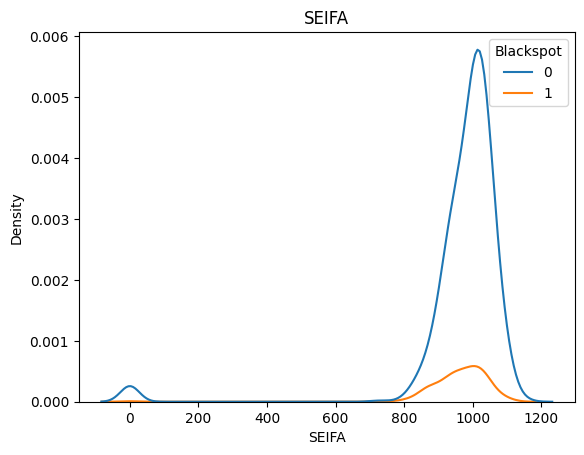

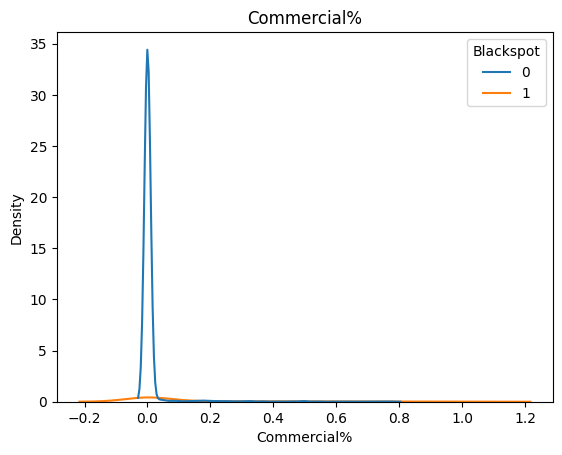

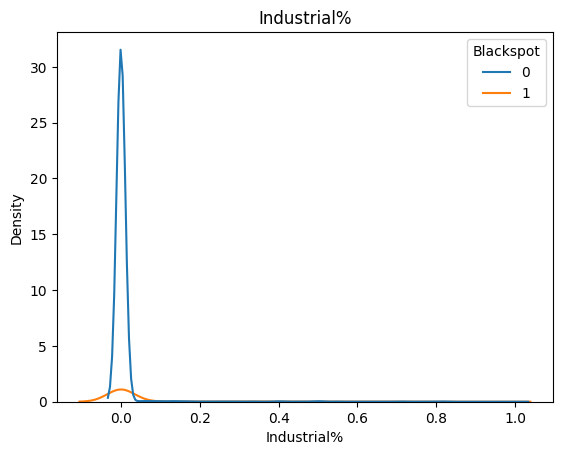

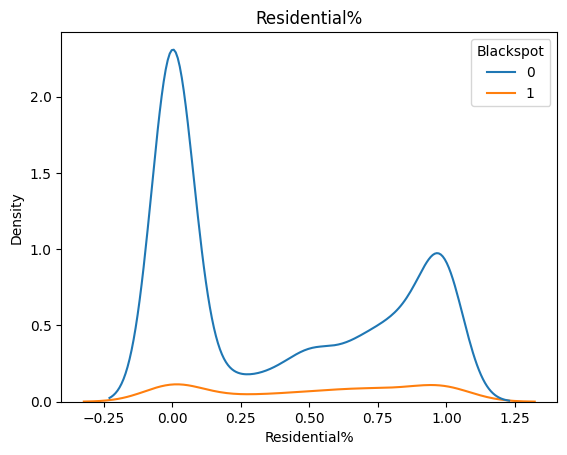

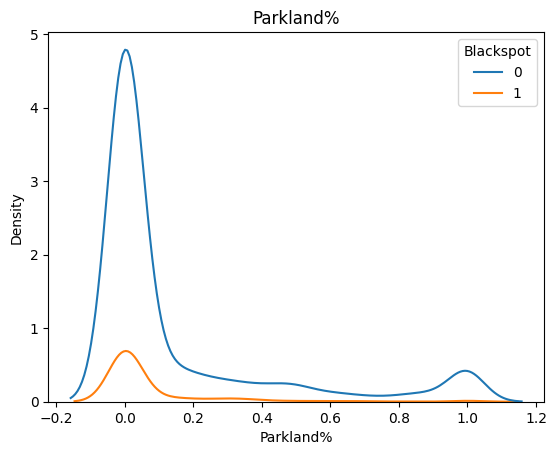

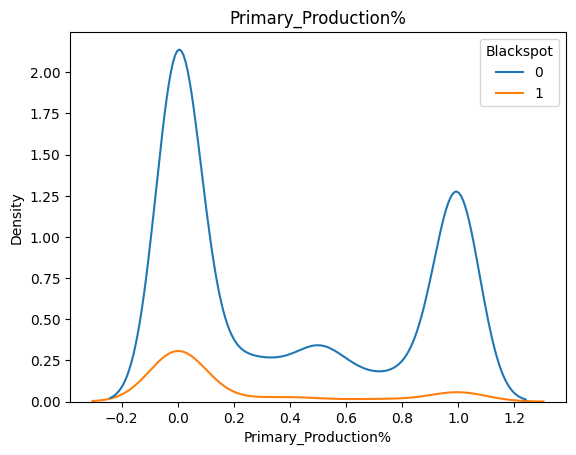

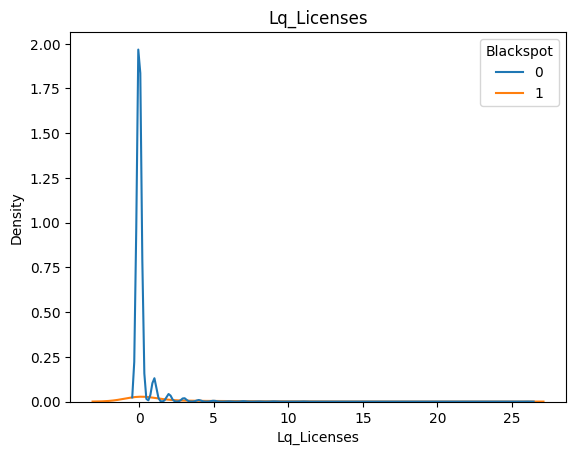

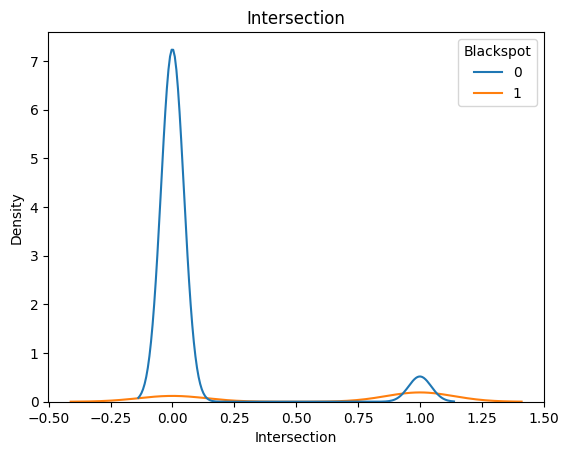

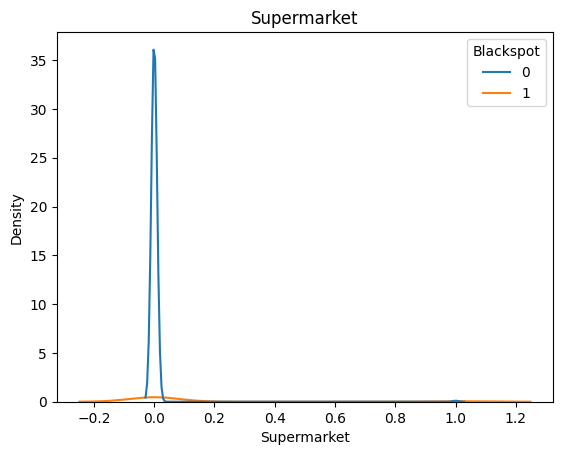

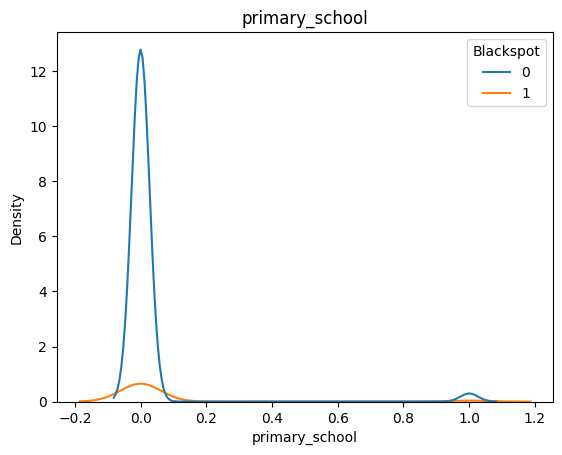

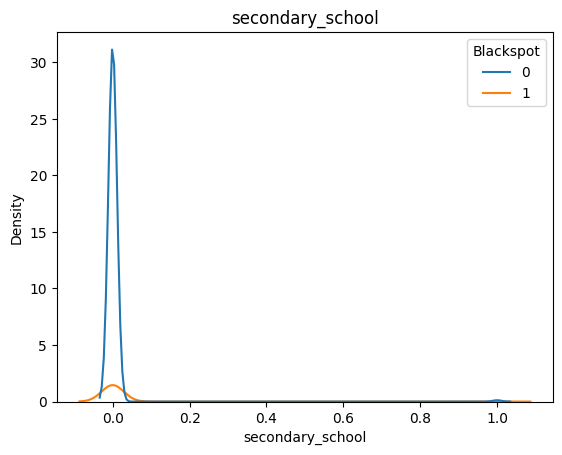

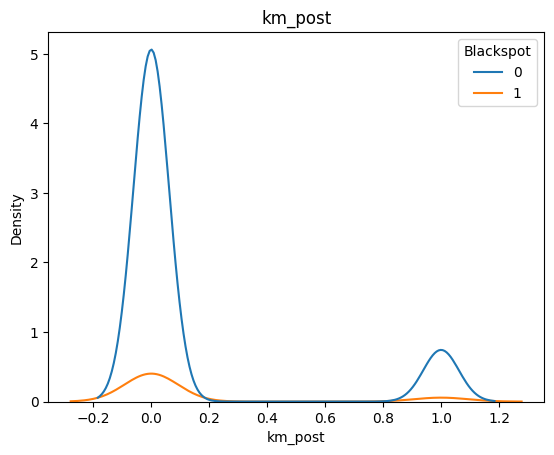

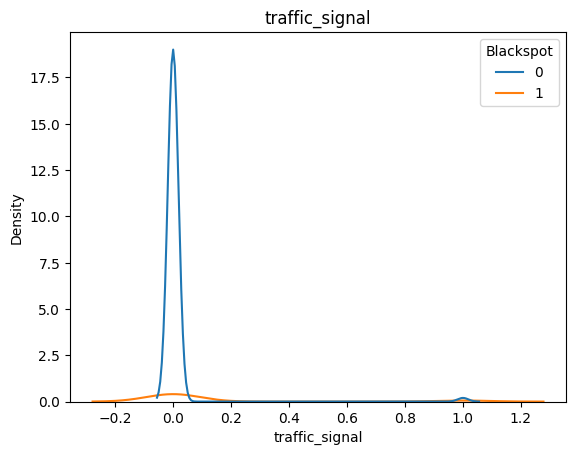

In [ ]:
#KDE Plots
for i in blackspots.iloc[:,:32]:
  sns.kdeplot(data=blackspots,x=blackspots[i], hue='Blackspot',legend= True)
  plt.title(i)
  plt.show()

Bivariate analysis with scatter plot

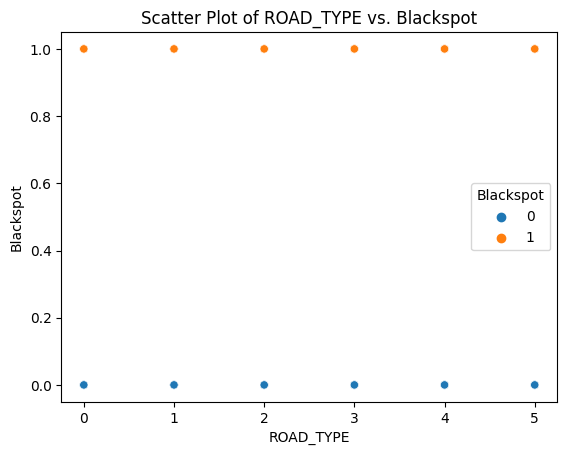

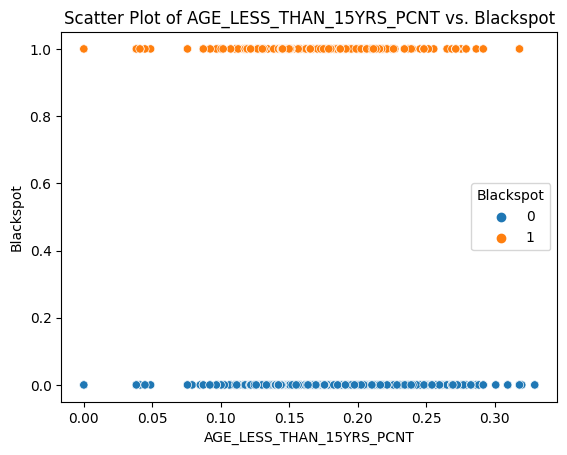

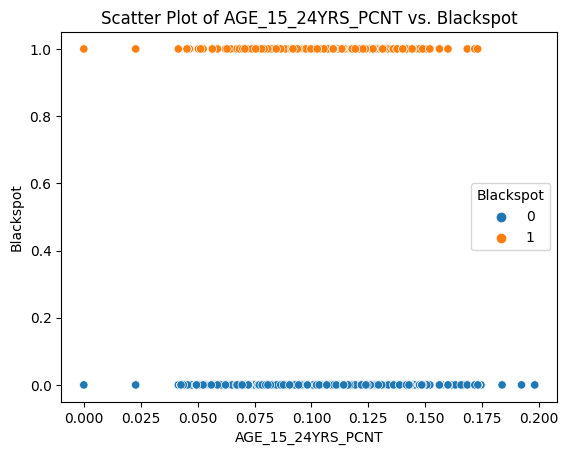

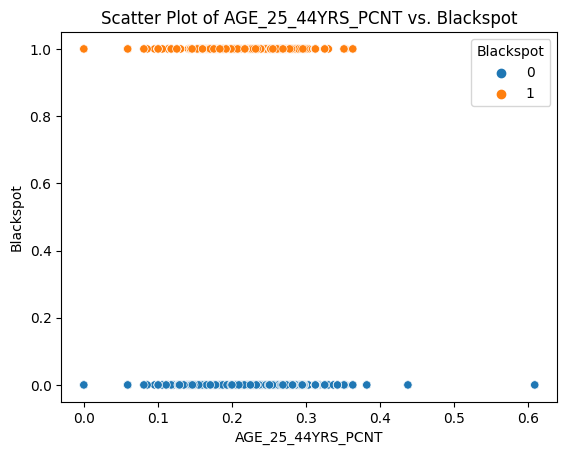

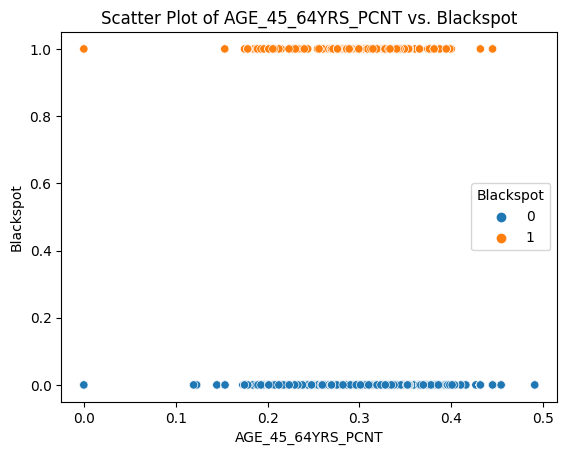

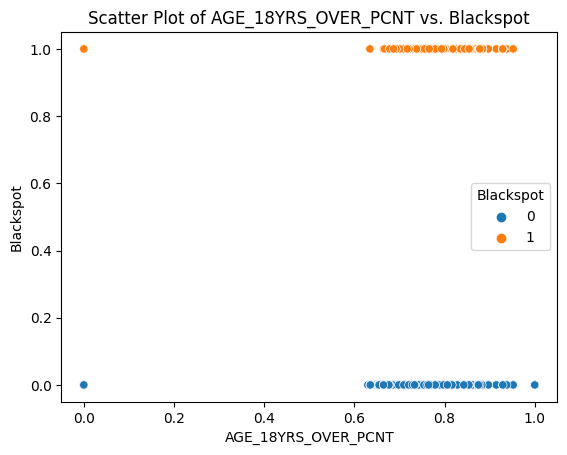

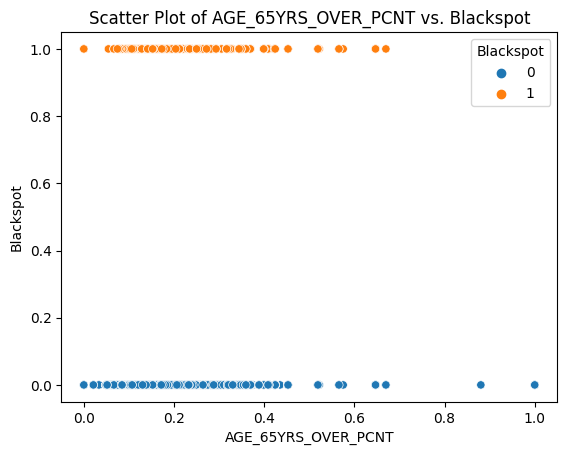

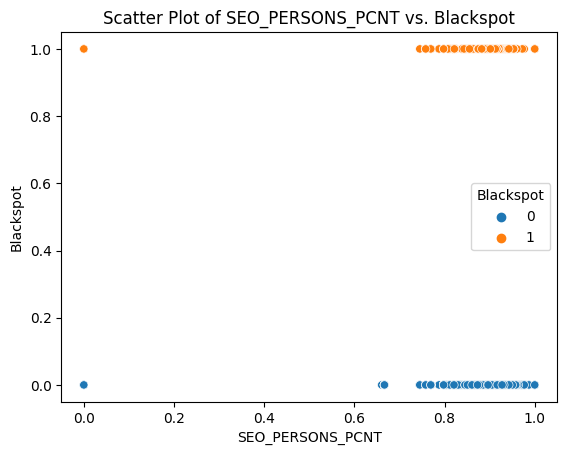

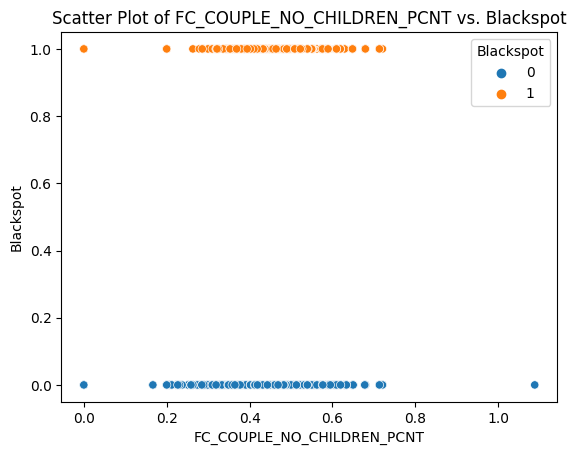

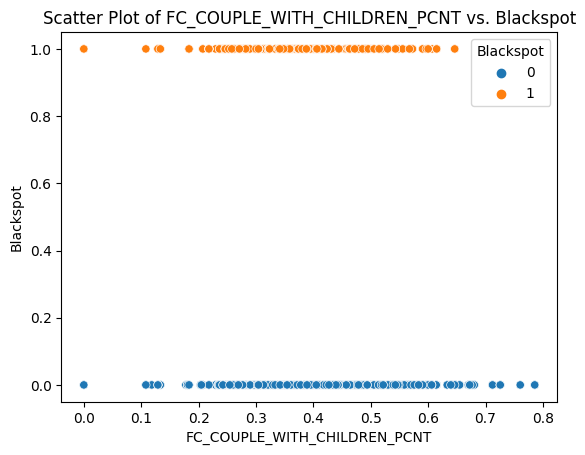

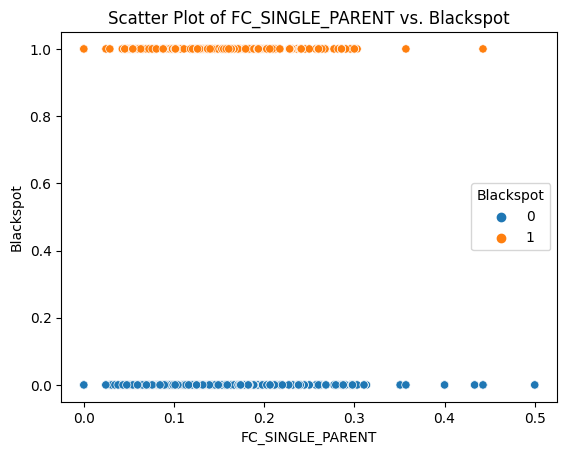

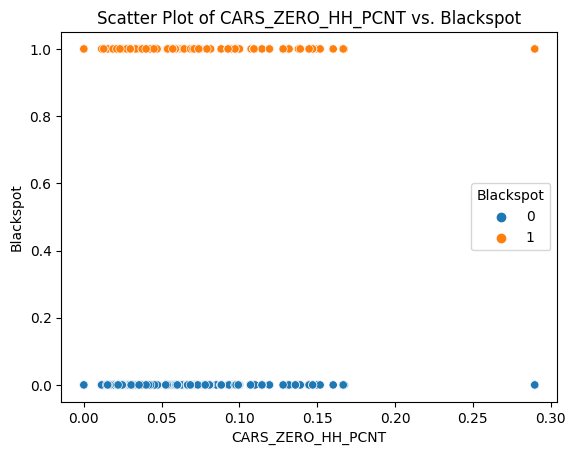

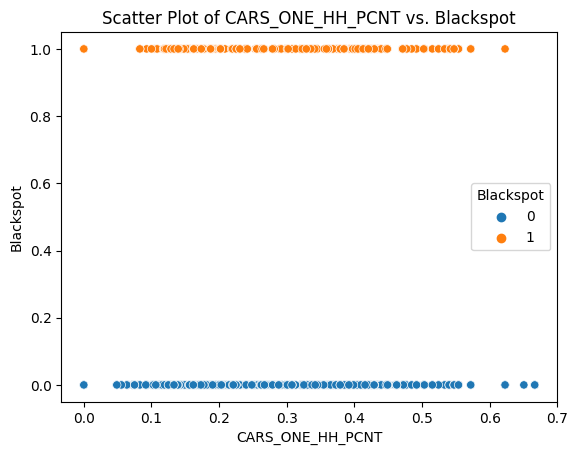

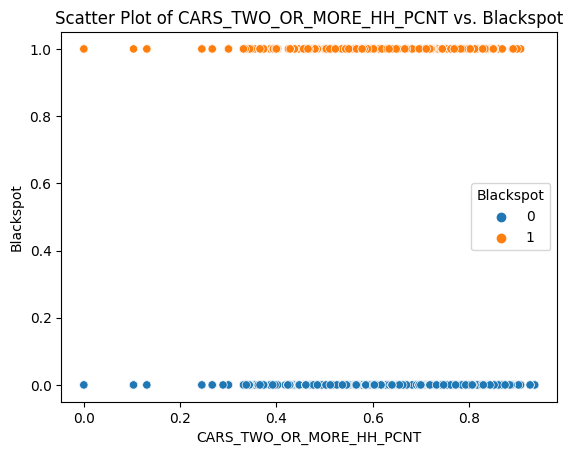

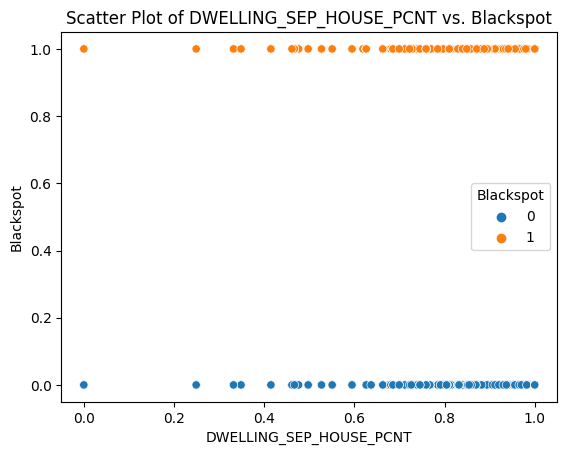

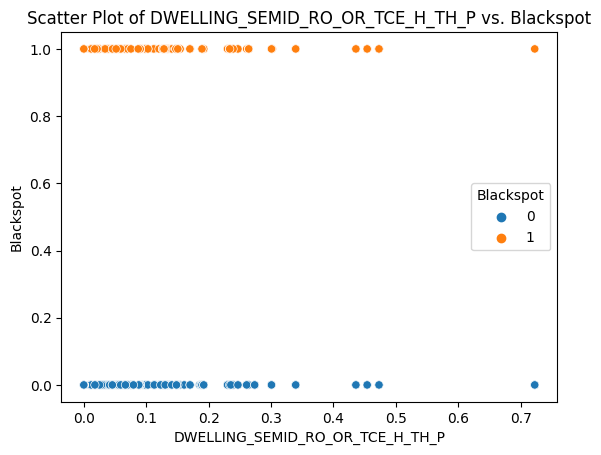

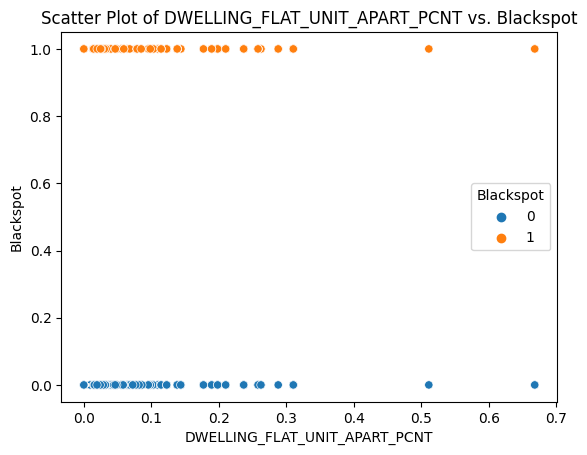

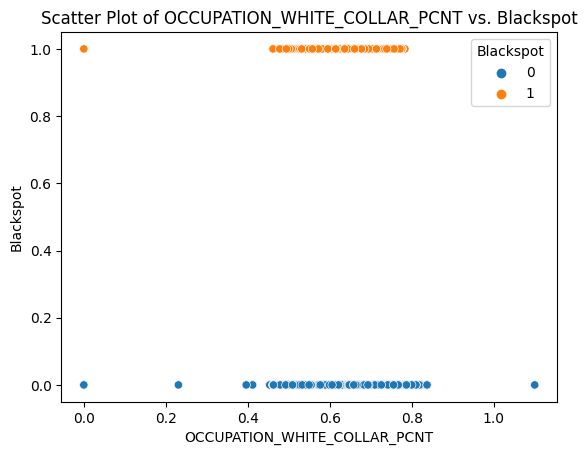

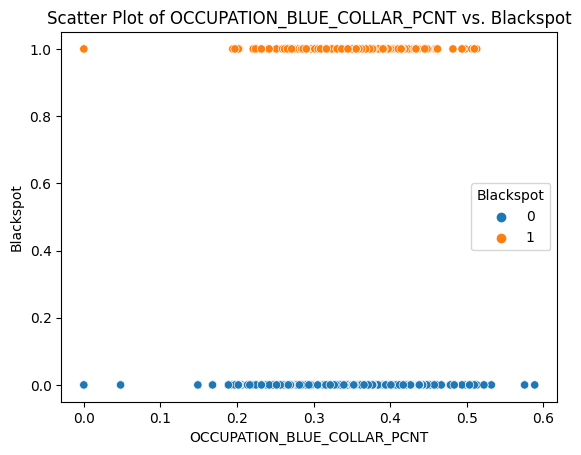

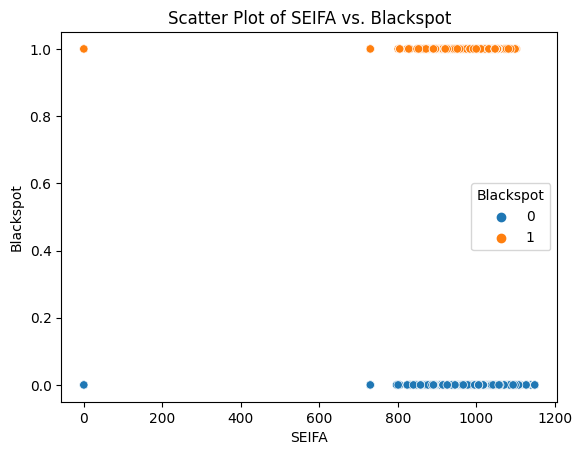

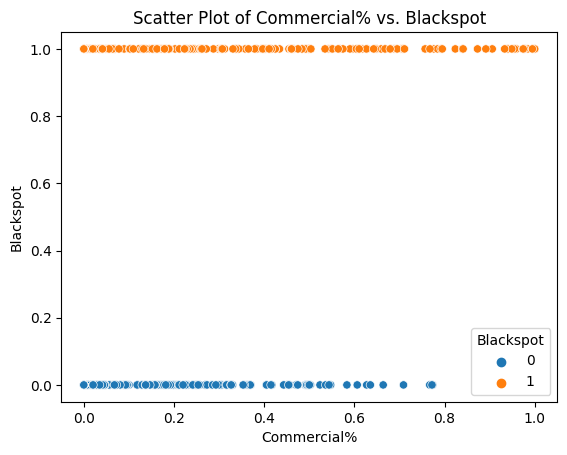

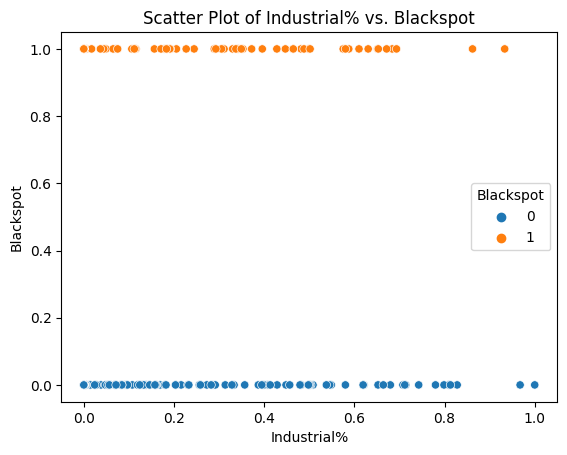

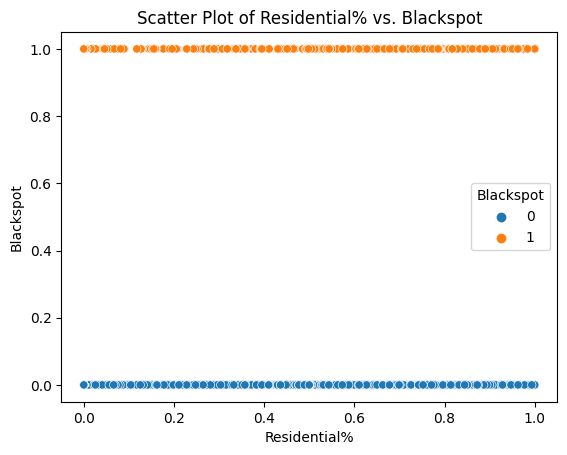

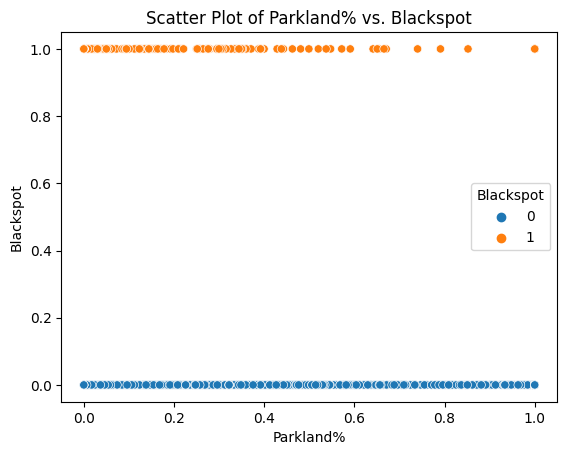

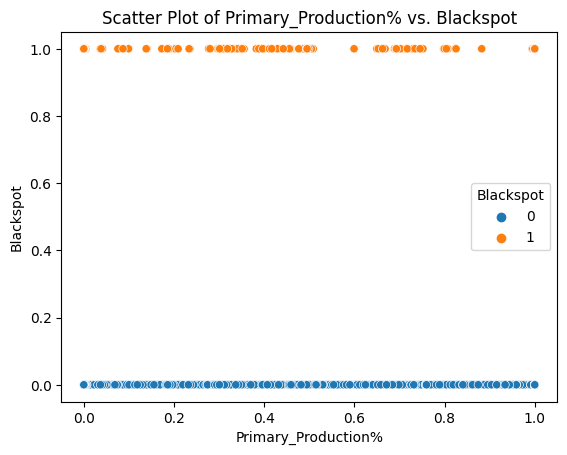

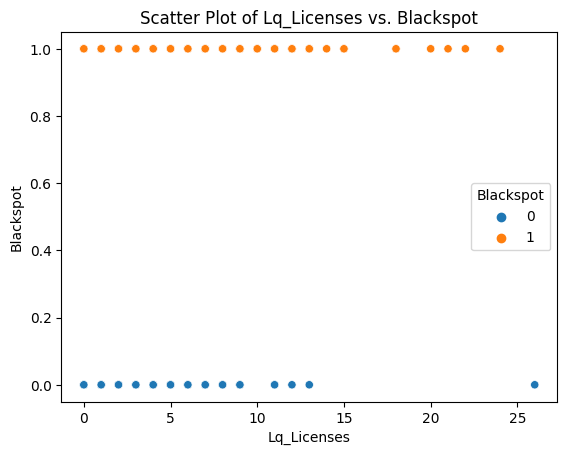

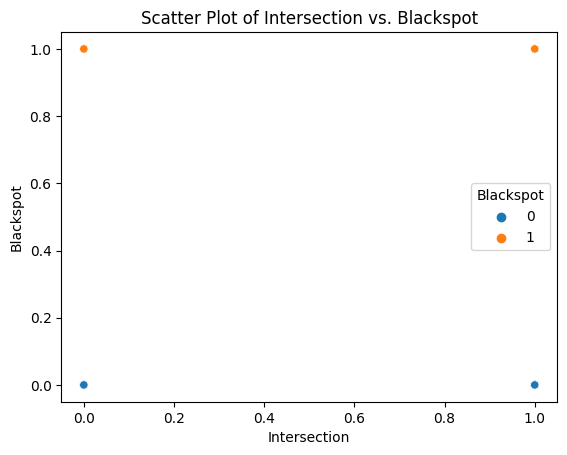

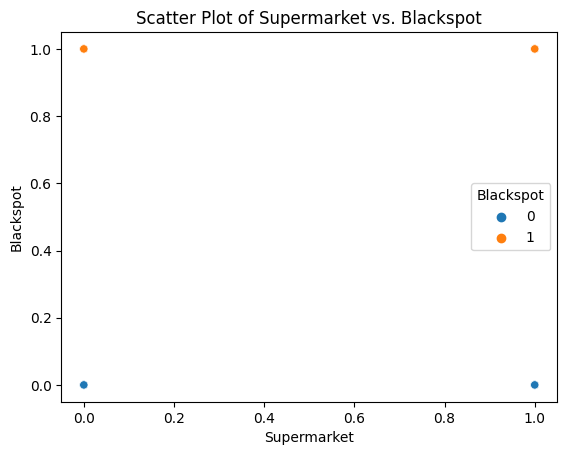

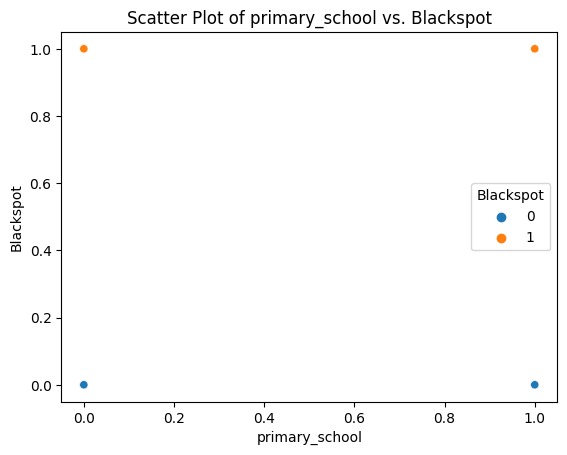

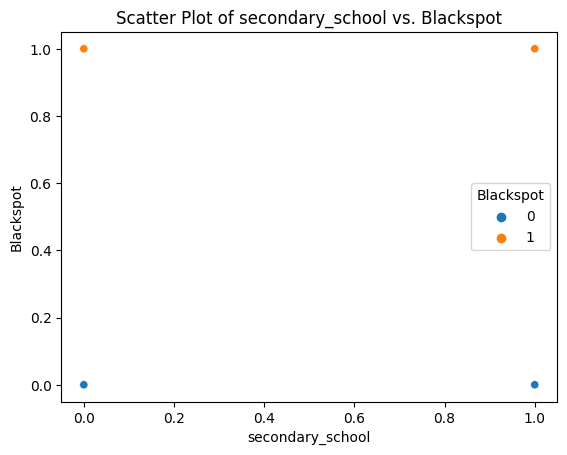

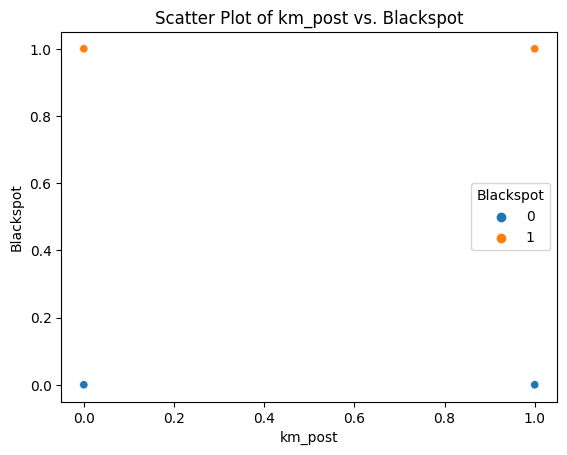

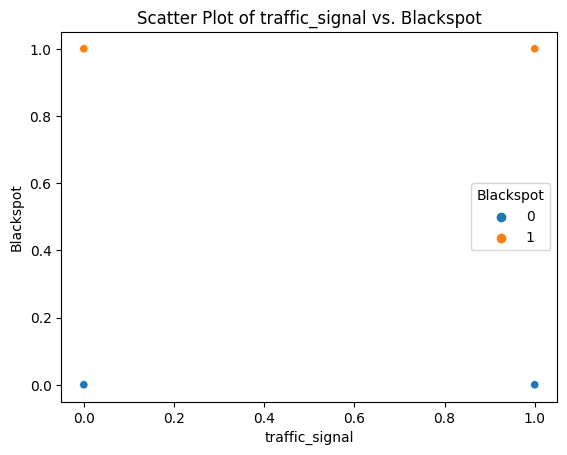

In [ ]:
#scatter plot
for i in blackspots.iloc[:, :32]:
    sns.scatterplot(data=blackspots, x=i, y='Blackspot', hue='Blackspot')
    plt.title(f'Scatter Plot of {i} vs. Blackspot')
    plt.legend(title='Blackspot')
    plt.show()

Multivariate Analysis with heat map


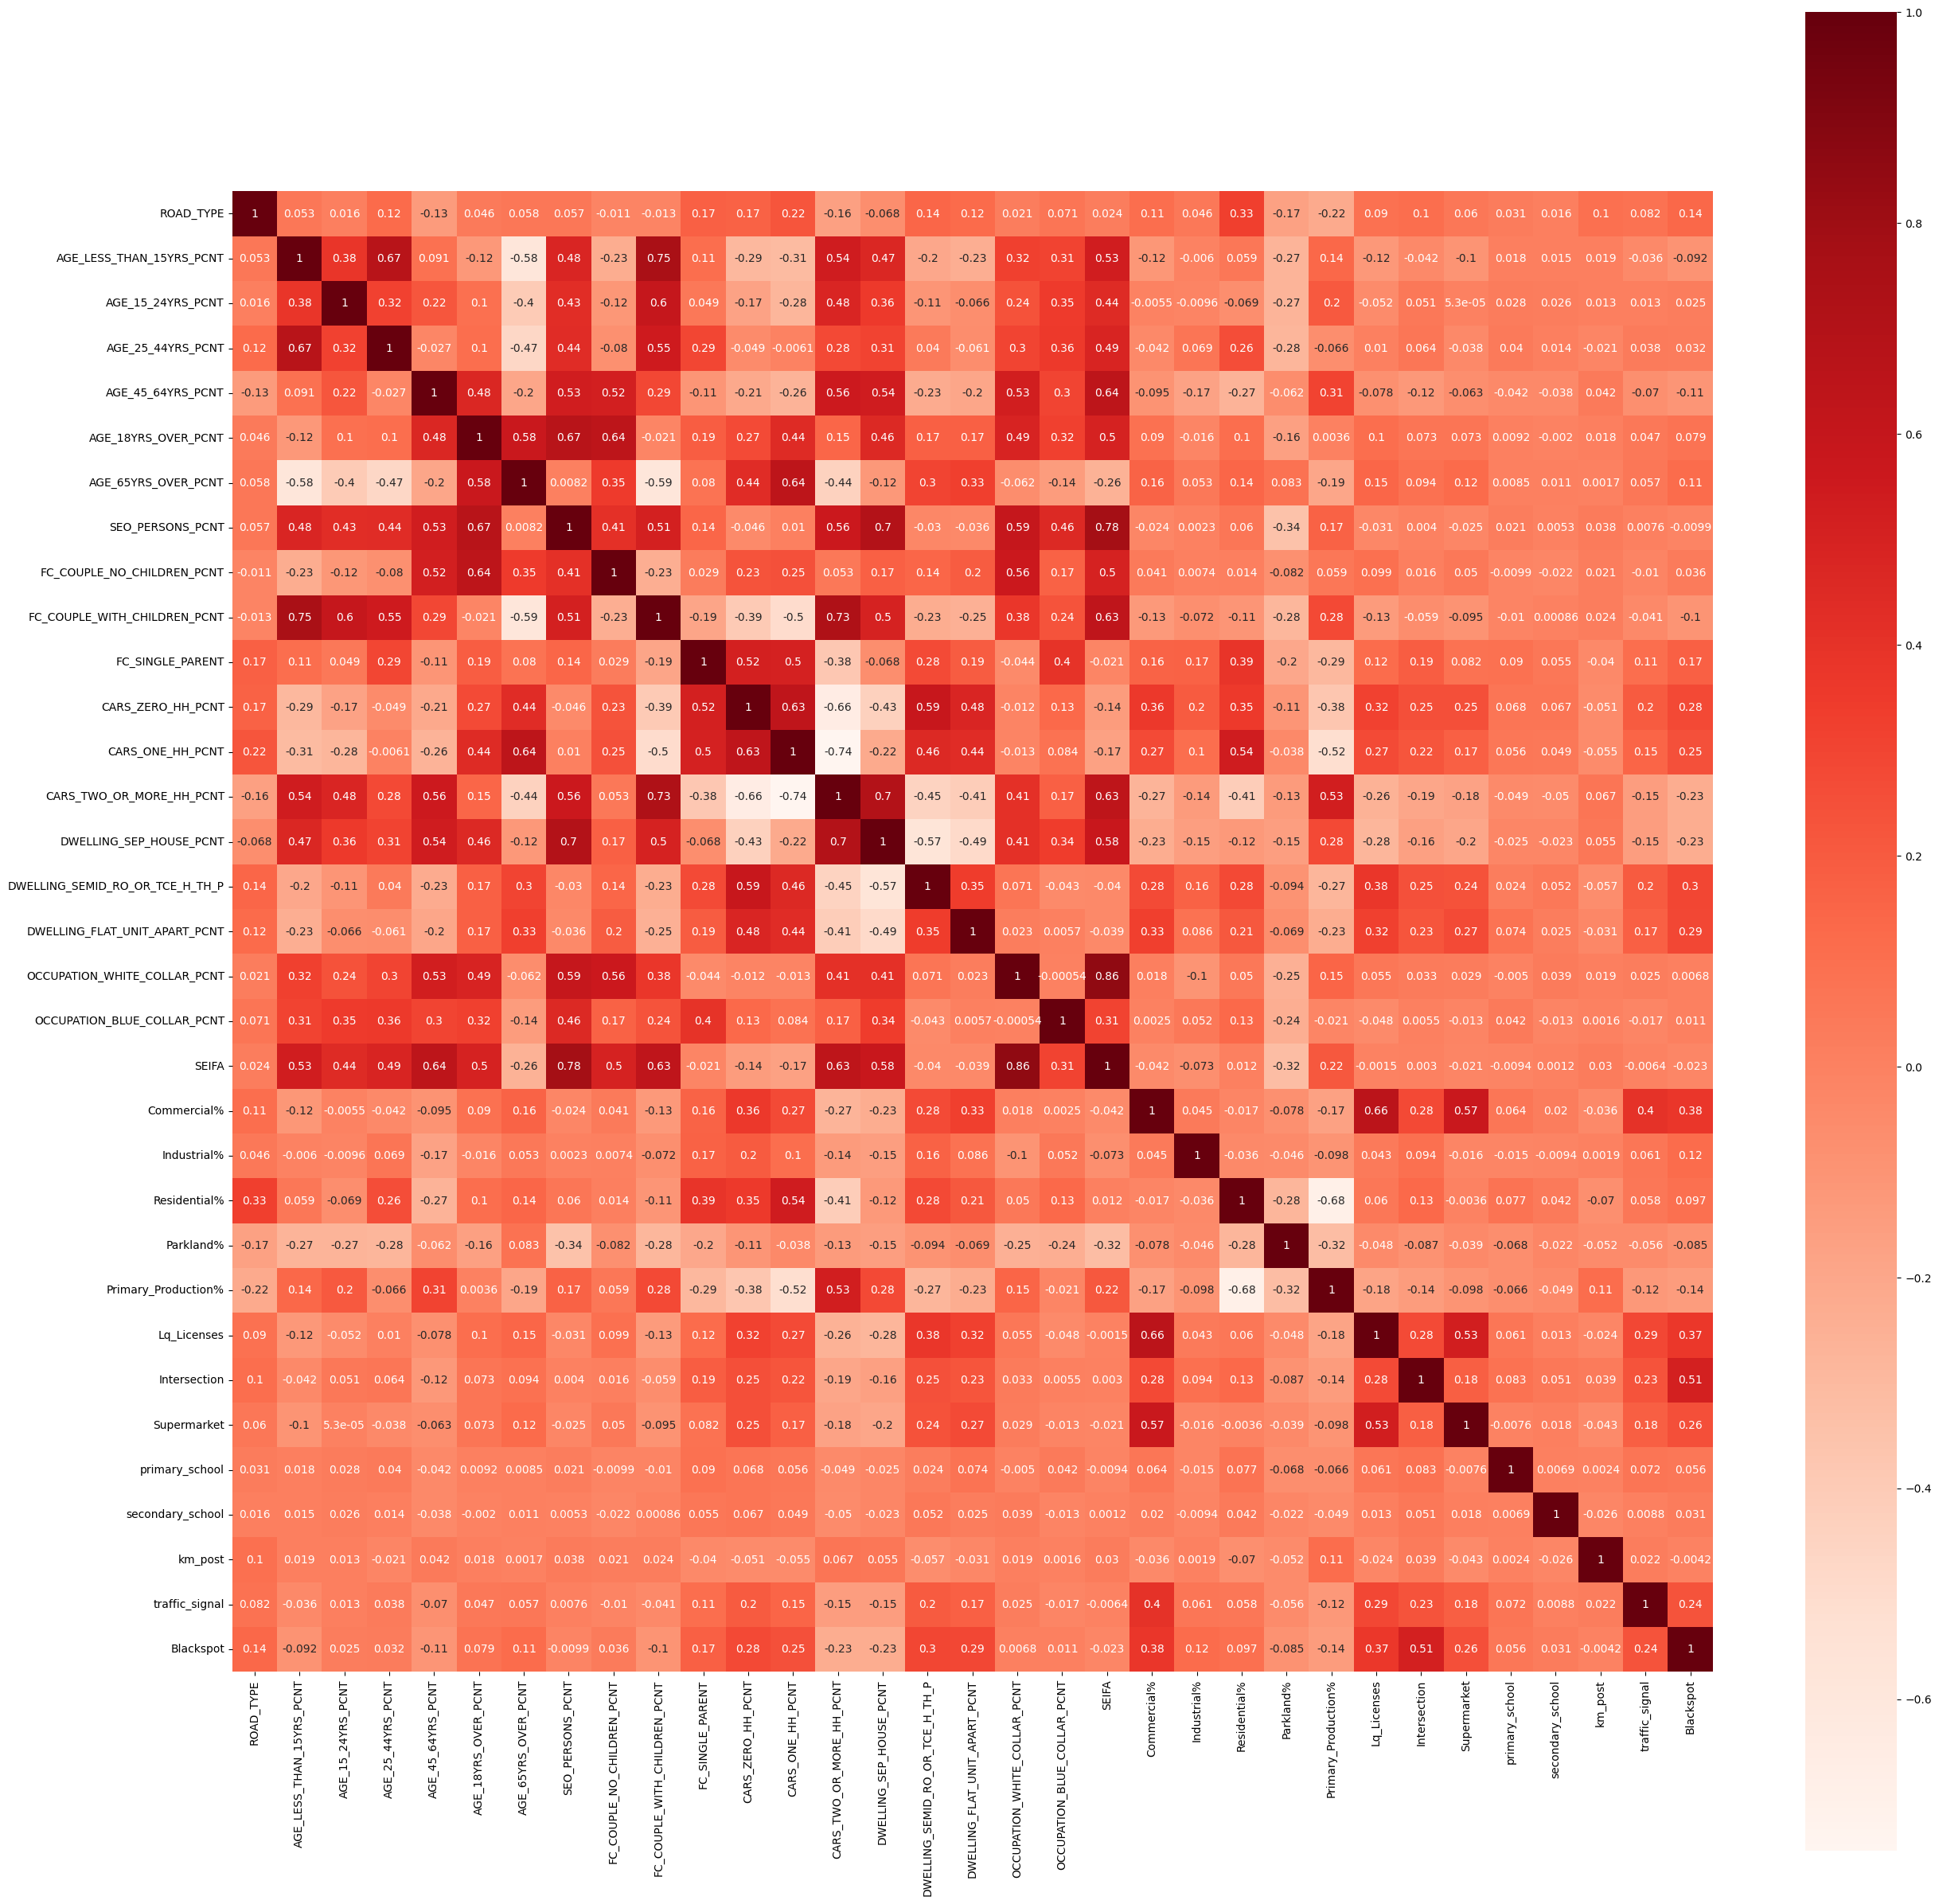

In [ ]:
#Using a heatmap to conduct a multi variate analysis
plt.figure(figsize=(30, 30))
sns.heatmap(blackspots.corr(), square=True, cmap='Reds', annot=True)
plt.show()


Feature selection
Based on the correlation heatmap outcome I have decided to select the following variables as the features
0.14 - road type

Age 46 – 65 pcnt –0.11

Age 65 over 0.11

FC couple with children -0.1

FC single parent – 0.17

Cars Zero HH pcnt 0.28

Cars one HH pcnt 0.25

Cars two or more HH pcnt –0.23

Dwelling sep house pcnt –0.23

Dwelling semid ro or rce h th p   0.3

Dwelling flat unit apartm pcnt  0.29

Commercial % 0.38

Industrial 0.12

Lq license 0.37

Intersection 0.51

Supermarket 0.26

Traffic signal 0.24

In [ ]:
#Selecting predictors
features = ['CARS_ZERO_HH_PCNT','CARS_ONE_HH_PCNT','DWELLING_SEMID_RO_OR_TCE_H_TH_P','DWELLING_FLAT_UNIT_APART_PCNT','Commercial%','Lq_Licenses','Intersection','traffic_signal'] #Based on principle of parsimony, reduced the number of variables to 8 from the above list.

#complete the code below
X = blackspots[features]
y = blackspots.Blackspot

<a id = "cell_modeling"></a>
## 3. Machine learning model development

#### NOTE: You can create multiple Markdown and Code cells to present your work.
**Aim:** To demonstrate your understanding in AI modeling.

_Use this section to show and discuss the process/processes as relevant to the case study, key steps to run and complete the experiment and details of models._  

This section may include:
* How to split dataset.
* How to initiate machine learning model and fit training data.
* How to use trained model to predict labels for training and testing dataset.

In [ ]:
#Importing important functions from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [ ]:
#Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [ ]:
#inspecting the split datasets
print(X_train.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4260 entries, 4362 to 5252
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   CARS_ZERO_HH_PCNT                4260 non-null   float64
 1   CARS_ONE_HH_PCNT                 4260 non-null   float64
 2   DWELLING_SEMID_RO_OR_TCE_H_TH_P  4260 non-null   float64
 3   DWELLING_FLAT_UNIT_APART_PCNT    4260 non-null   float64
 4   Commercial%                      4260 non-null   float64
 5   Lq_Licenses                      4260 non-null   int64  
 6   Intersection                     4260 non-null   int64  
 7   traffic_signal                   4260 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 299.5 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1066 entries, 445 to 547
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           -------

#Training the logistic regression model to make predictions


In [ ]:
logisticreg = LogisticRegression(max_iter=100)

In [ ]:
#Training the Logistic Regression Classifer with the traning dataset
logisticreg = logisticreg.fit(X_train, y_train)

In [ ]:
#Predicting the y variables
y_pred = logisticreg.predict(X_test)

In [ ]:
coef = logisticreg.coef_.flatten()

Inspecting Predictions made by the model

In [ ]:
#joining the unseen y_test with predicted value into a data frame
Comparission=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

#join X_test with the new dataframe
Comparission=pd.concat([X_test,Comparission], axis=1)

Comparission.head(20)

CARS_ZERO_HH_PCNT  CARS_ONE_HH_PCNT  DWELLING_SEMID_RO_OR_TCE_H_TH_P  \
445               0.068             0.383                            0.087   
5147              0.031             0.267                            0.018   
1554              0.070             0.430                            0.454   
2448              0.000             0.156                            0.000   
1623              0.097             0.447                            0.170   
3741              0.114             0.416                            0.090   
2425              0.036             0.308                            0.000   
3922              0.000             0.170                            0.000   
3153              0.000             0.177                            0.000   
792               0.024             0.357                            0.027   
694               0.000             0.231                            0.000   
1247              0.000             0.330                            0.000   
743               0.000             0.083                            0.000   
3998              0.015             0.405                            0.039   
1177              0.000             0.346                            0.000   
2869              0.000             0.122                            0.000   
2809              0.000             0.000                            0.000   
4794              0.000             0.143                            0.000   
5157              0.000             0.122                            0.000   
4247              0.055             0.380                            0.050   

      DWELLING_FLAT_UNIT_APART_PCNT  Commercial%  Lq_Licenses  Intersection  \
445                           0.068        0.000            0             0   
5147                          0.000        0.000            1             0   
1554                          0.079        0.000            1             1   
2448                          0.000        0.000            0             0   
1623                          0.189        0.000            0             0   
3741                          0.114        0.019            0             0   
2425                          0.000        0.000            1             0   
3922                          0.000        0.000            0             0   
3153                          0.000        0.000            0             0   
792                           0.033        0.000            0             0   
694                           0.000        0.000            0             0   
1247                          0.000        0.000            0             0   
743                           0.000        0.000            0             0   
3998                          0.015        0.000            0             0   
1177                          0.000        0.000            0             0   
2869                          0.000        0.000            0             1   
2809                          0.000        0.000            0             0   
4794                          0.000        0.000            0             0   
5157                          0.000        0.000            0             0   
4247                          0.144        0.000            2             1   

      traffic_signal  Actual  Predicted  
445                0       0          0  
5147               0       0          0  
1554               0       1          1  
2448               0       0          0  
1623               0       1          0  
3741               1       0          0  
2425               0       0          0  
3922               0       0          0  
3153               0       0          0  
792                0       0          0  
694                0       0          0  
1247               0       0          0  
743                0       0          0  
3998               0       1          0  
1177               0       0          0  
2869               0       0       

<a id = "cell_Evaluation"></a>
## 4. Model evaluation                                                                                                                       




In [ ]:
#Accuracy, Precision, Recall, F1 using the parameters y_test and y_pred
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print("Precision: ", metrics.precision_score(y_test,y_pred))
print("Recall: ", metrics.recall_score(y_test,y_pred))
print("F1: ", metrics.f1_score(y_test,y_pred))

Accuracy:  0.9118198874296435
Precision:  0.6842105263157895
Recall:  0.3391304347826087
F1:  0.4534883720930233


In [ ]:
#print confusion matrix and evaluation report
confusionmatrix = confusion_matrix(y_test, y_pred)
print(confusionmatrix)
print(classification_report(y_test, y_pred))

[[933  18]
 [ 76  39]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       951
           1       0.68      0.34      0.45       115

    accuracy                           0.91      1066
   macro avg       0.80      0.66      0.70      1066
weighted avg       0.90      0.91      0.90      1066



Plotting ROC curve and Confusion matrix

In [ ]:
# Gettinh the probabilities of the classes on the test set
probabilities = logisticreg.predict_proba(X_test)

In [ ]:
#Probabilities for the positive class (Blackspot)
y_prob = probabilities[:, 1]

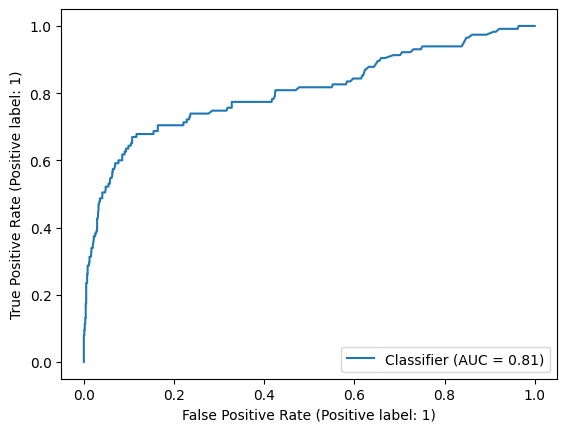

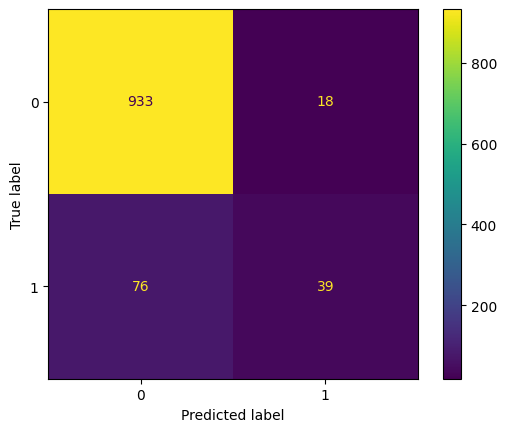

In [ ]:
#import classes to display RocCurve and Confusion Matrix, read example from the website and try on your own
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

#complete the code to display RocCurve and Confusion Matrix
RocCurveDisplay.from_predictions(y_test, y_prob)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

Axes(0.125,0.11;0.775x0.77)


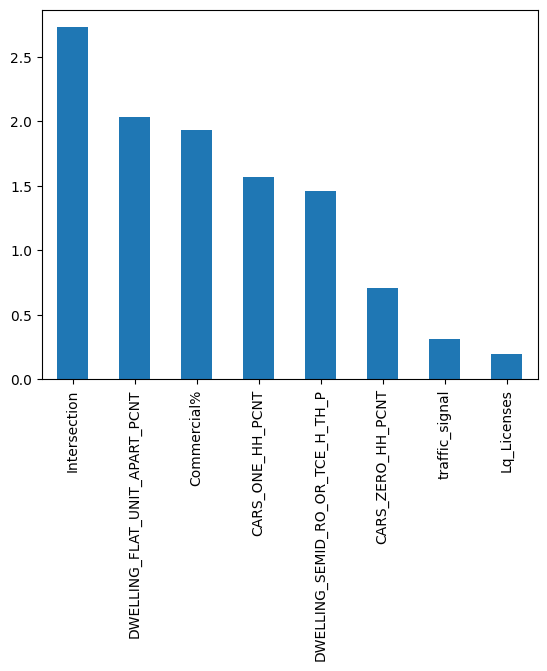

In [ ]:
#Visualise the coefficients
coefs = pd.Series(logisticreg.coef_[0], index=X.columns.values)
print (coefs.sort_values(ascending = False).plot(kind='bar'))

In [ ]:
print('Blackspot = %.3f' % intercept,
      '+ %.3f' % coef[0], '* Intersection',
      '+ %.3f' % coef[1], '* DWELLING_FLAT_UNIT_APART_PCNT',
      '+ %.3f' % coef[3], '* CARS_ONE_HH_PCNT',
      '+ %.3f' % coef[4], '* DWELLING_SEMID_RO_OR_TCE_H_TH_P',
      '+ %.3f' % coef[5], '* CARS_ZERO_HH_PCNT',
      '+ %.3f' % coef[6], '* traffic_signal',
      '+ %.3f' % coef[7], '* Lq_Licenses',)

Blackspot = -3.725 + 0.706 * Intersection + 1.570 * DWELLING_FLAT_UNIT_APART_PCNT + 2.036 * CARS_ONE_HH_PCNT + 1.931 * DWELLING_SEMID_RO_OR_TCE_H_TH_P + 0.195 * CARS_ZERO_HH_PCNT + 2.729 * traffic_signal + 0.309 * Lq_Licenses
